# Customer Retention Analysis

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. 

# Factors contributing To Retention

Five major factors that contributed to the success of an e-commerce store have been identified as:
    
    *service quality,
    
    *system quality,
    
    *information quality, 
    
    *trust 
    
    *net benefit. 

The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

# Data Description

The task is to train the model to find the Indian online retailer you would recommend to a friend

# Target Variable

'Which of the Indian online retailer would you recommend to a friend?' is the target variable.

It contains data of the online retail stores which are recommended to others.

It is a classification variable.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [2]:
df= pd.read_excel(r'C:\python\Customer_Dataset.xlsx')

In [3]:
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

There are 71 columns and 269 rows in this dataset, in which most columns are categorical including the taget variable

In [4]:
df.shape

(269, 71)

In [5]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

# Check Numerical Columns

In [7]:
Numerical_columns= [x for x in df.dtypes.index if df.dtypes[x]== 'int64']
Numerical_columns

['4 What is the Pin Code of where you shop online from?']

Except for the pincode column, all the other columns are categorical.

# Data Cleaning

# Check For Null Values

In [8]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

<AxesSubplot:>

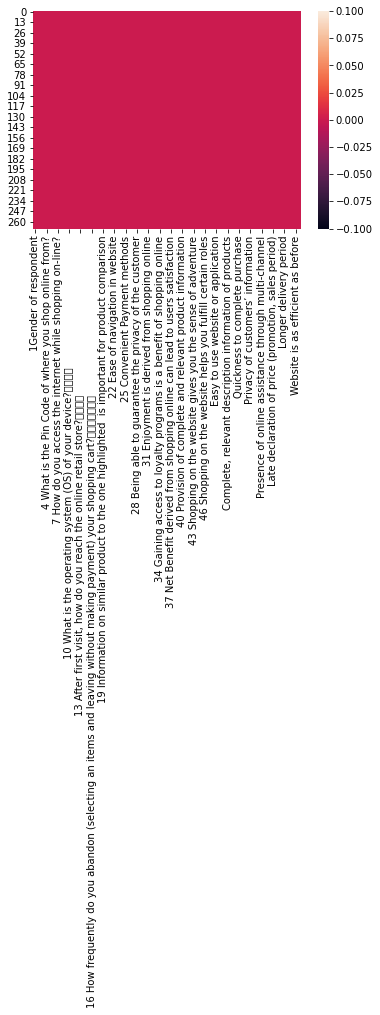

In [9]:
sns.heatmap(df.isnull())

There is no null values in the dataset, so we shall proceed with our analysis

dataset.dtypesThe pincode of the cities has no big impact on the customers recommendwtion of websites, so we will drop the column

In [10]:
df=df.drop(['4 What is the Pin Code of where you shop online from?'],axis=1)

In [11]:
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome                                                                                 
2                                      Google chrome                                                                                 
3                                             Safari                                                                                 
4                 

# Target Variable

In [12]:
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

# To Find Correlation between columns

# Visualization

Count Plot

# Target Variable

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

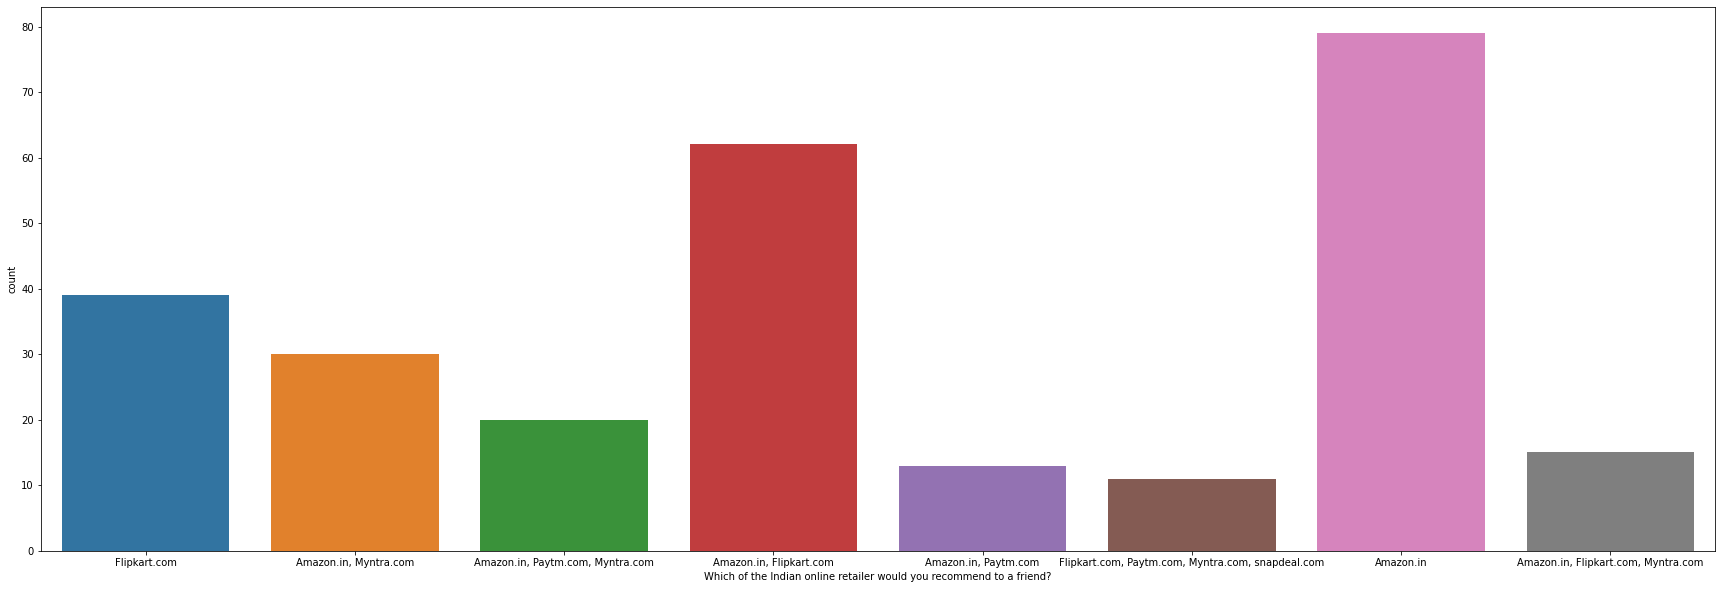

In [13]:
plt.figure(figsize=(30,10))
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'])

The Most recommended website is amazon.in

The least recommended site is combination of(Flipkart.com, patym.com,Myntra.com,snapdeal.com). 

We will analyse which of the independent variables contributes to the target variable

# City With More Online Customers

Text(0.5, 1.0, 'City With More Online Shoppers')

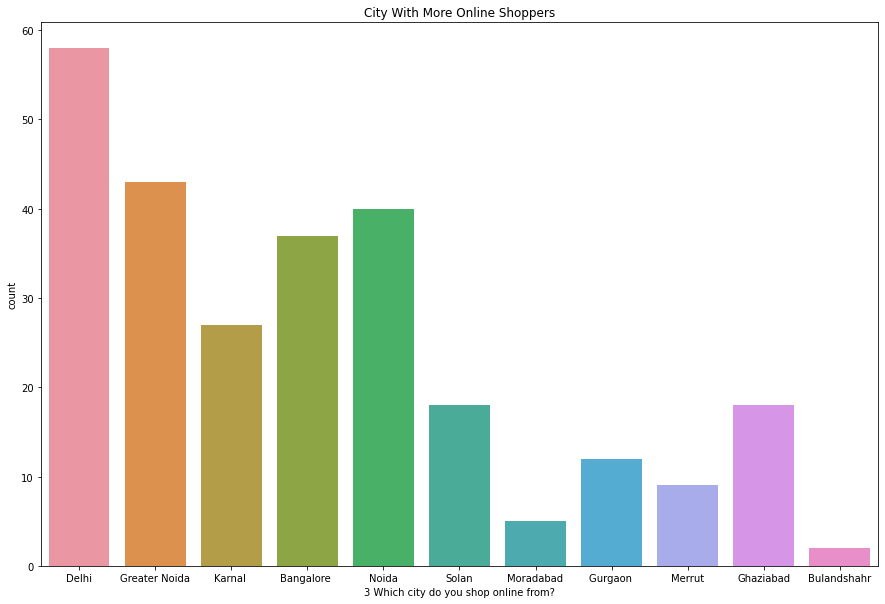

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(df['3 Which city do you shop online from?'])
plt.title('City With More Online Shoppers') 


More Customers with online shopping- Delhi

Less Customers with online shopping- Bulandshahr

<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

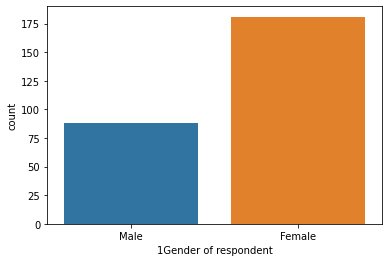

In [15]:
sns.countplot(df['1Gender of respondent'])

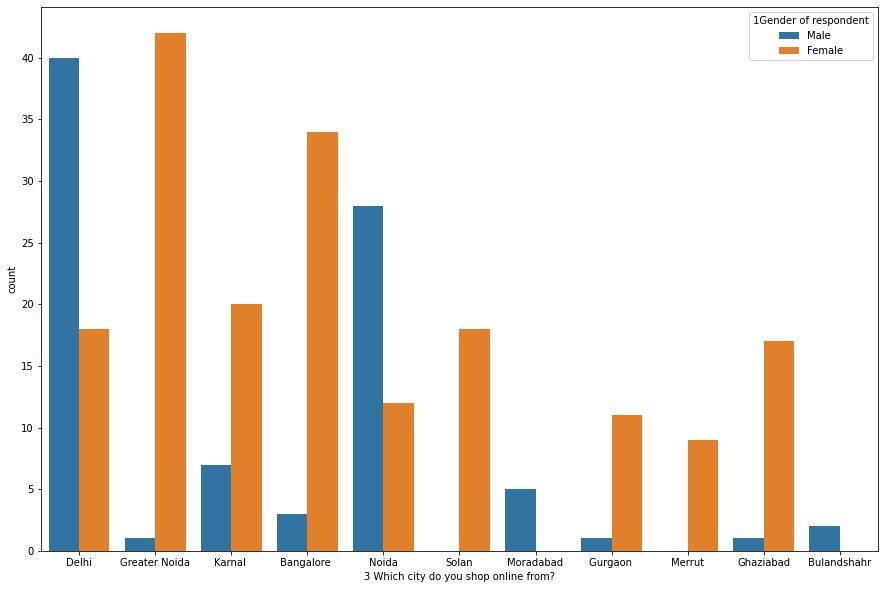

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x='3 Which city do you shop online from?', hue='1Gender of respondent', data=df)
plt.show()

This shows that overall online shopping is done more by females than males.

Considering each city,there are different approach from people.

Delhi- Male shoppers are more than females.

Greater Noida, Karnal, Bangalore, Ghaziabad- More female shoppers than males.

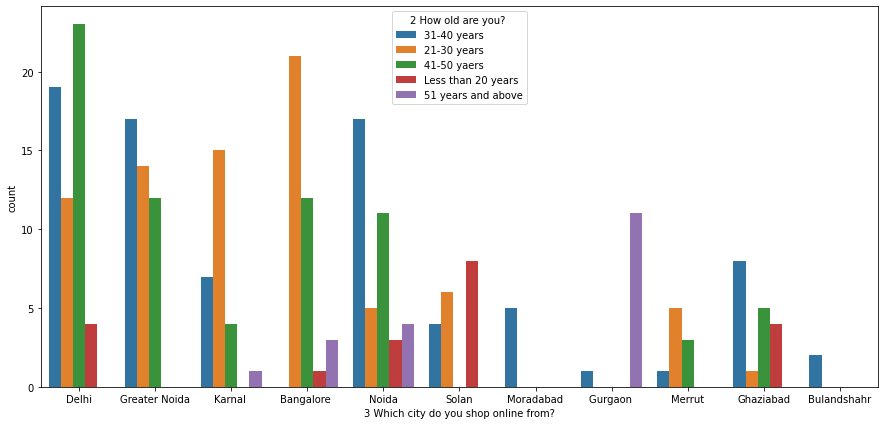

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['3 Which city do you shop online from?'],
                hue= df['2 How old are you? '])

plt.show()


This shows the different age group of people who make online purchases from different cities.21-30 years aged people have shopped considerably well in most cities

In [18]:
k=df.columns[4:10]

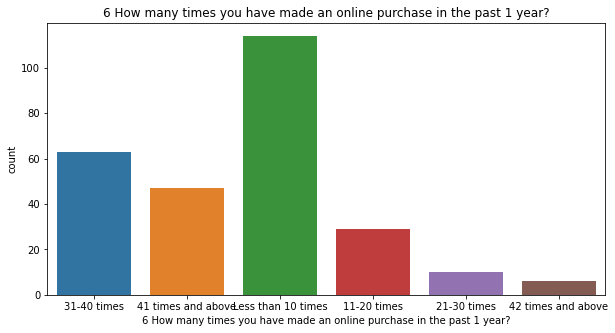

<Figure size 432x288 with 0 Axes>

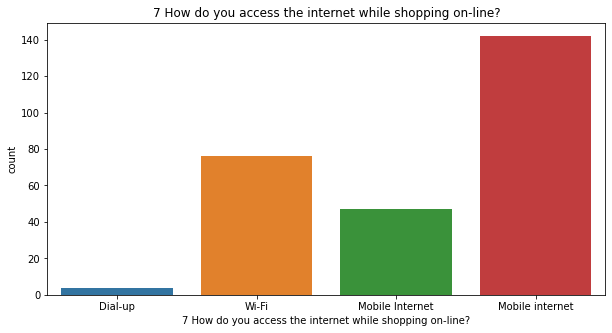

<Figure size 432x288 with 0 Axes>

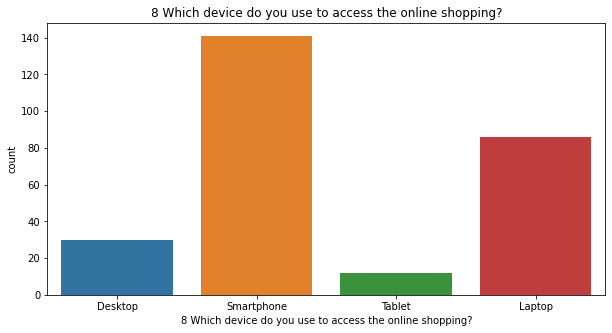

<Figure size 432x288 with 0 Axes>

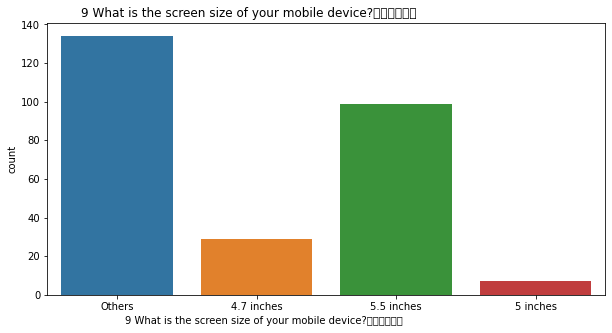

<Figure size 432x288 with 0 Axes>

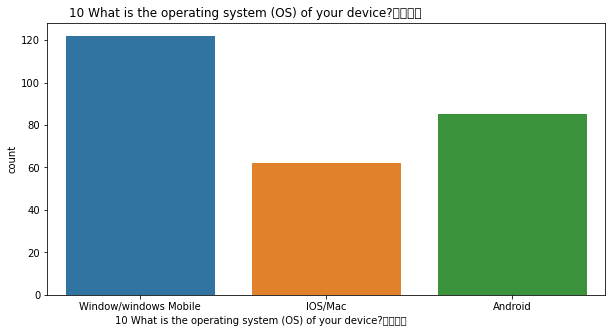

<Figure size 432x288 with 0 Axes>

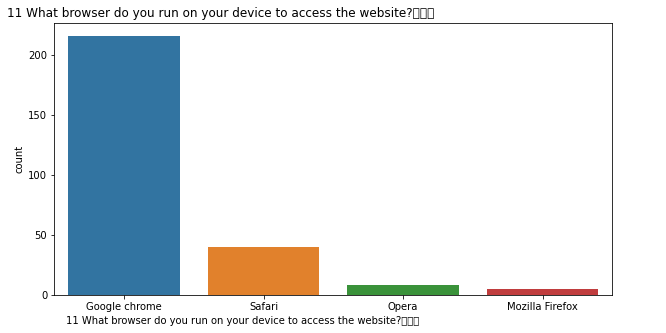

<Figure size 432x288 with 0 Axes>

In [19]:
for i in k:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()
    plt.tight_layout()

For the past 1 year, most people have purchased less than 10 times.

Most shoppersd use MOBILE INTERNET on SMART PHONES to make online purchase.

Widely used browser for online shopping is GOOGLE CHROME on WINDOWS

In [20]:
k1=df.columns[10:20]

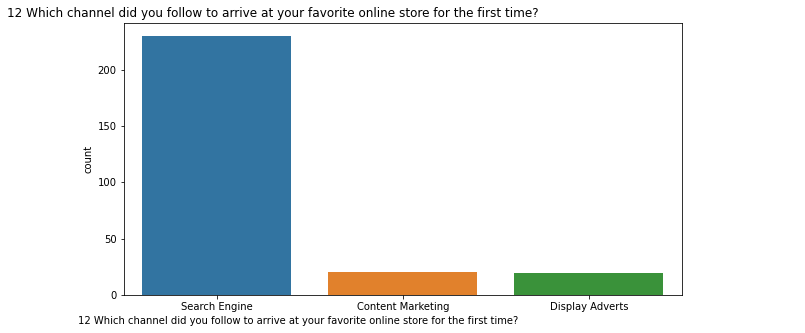

<Figure size 432x288 with 0 Axes>

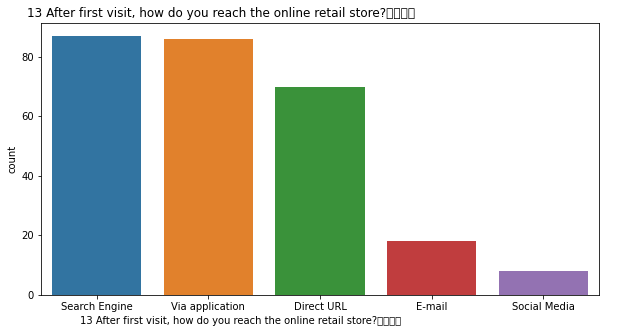

<Figure size 432x288 with 0 Axes>

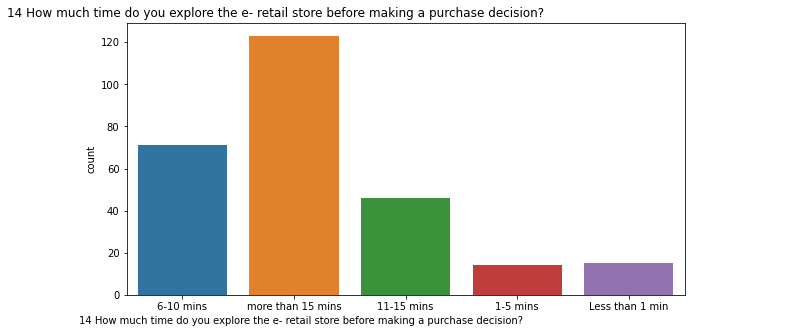

<Figure size 432x288 with 0 Axes>

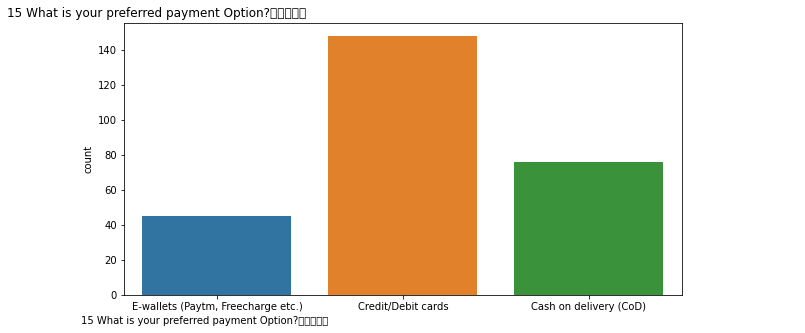

<Figure size 432x288 with 0 Axes>

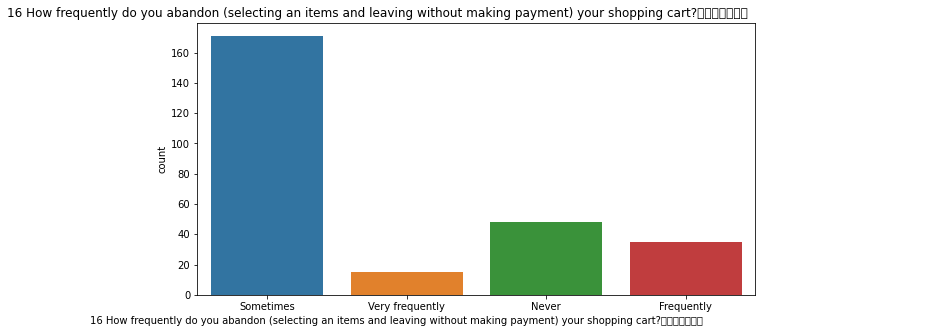

<Figure size 432x288 with 0 Axes>

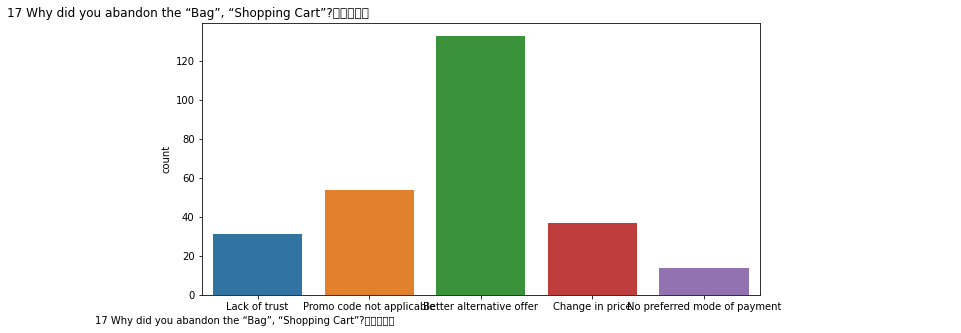

<Figure size 432x288 with 0 Axes>

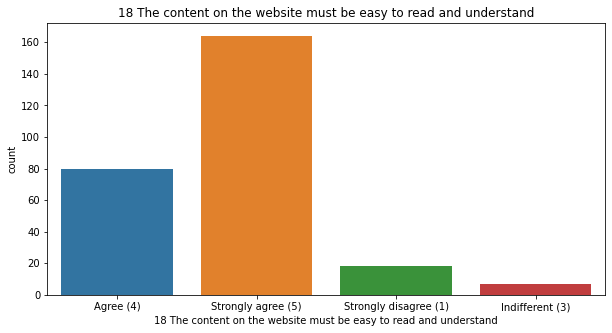

<Figure size 432x288 with 0 Axes>

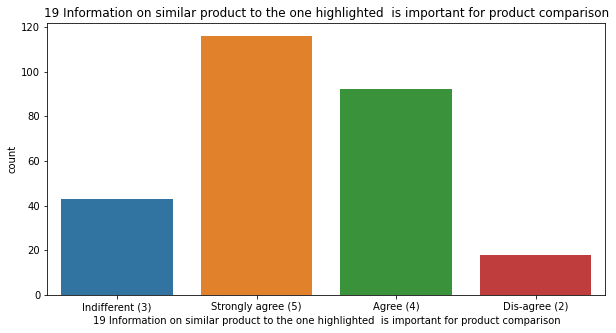

<Figure size 432x288 with 0 Axes>

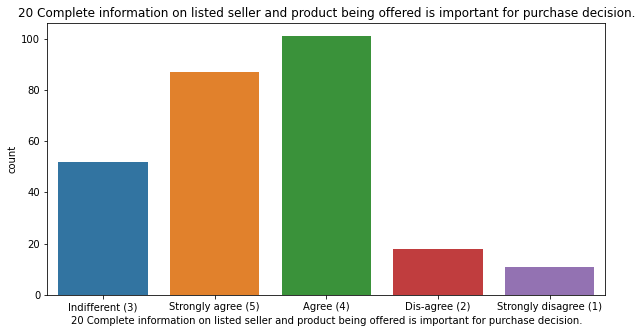

<Figure size 432x288 with 0 Axes>

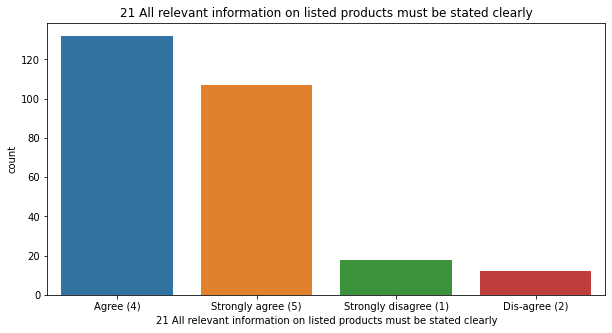

<Figure size 432x288 with 0 Axes>

In [21]:
for i in k1:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()
    plt.tight_layout()

From the above observations, SEARCH ENGINES are the most favourite channel for online shoppers, even after shopping for the first time.

Before making an order, people search for more than 15 mins to fix it and the preferred method of payment is through CARD.

With effective ALTERNATIVE OFFERS people tend to ABANDOM the cart SOMETIMES.

People strongly recommend readability and understandability of the products and information on similar products and sellers for making a decision to purchase online.

In [22]:
k2=df.columns[20:30]

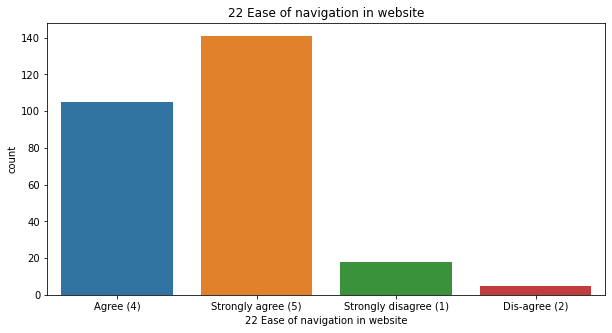

<Figure size 432x288 with 0 Axes>

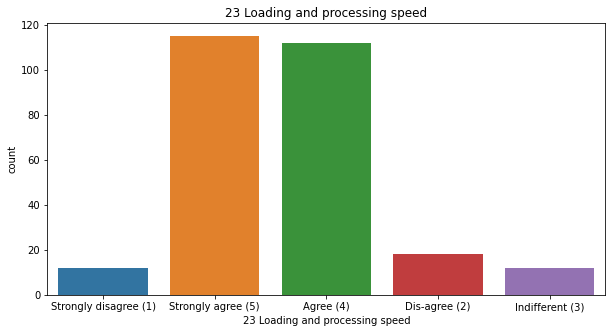

<Figure size 432x288 with 0 Axes>

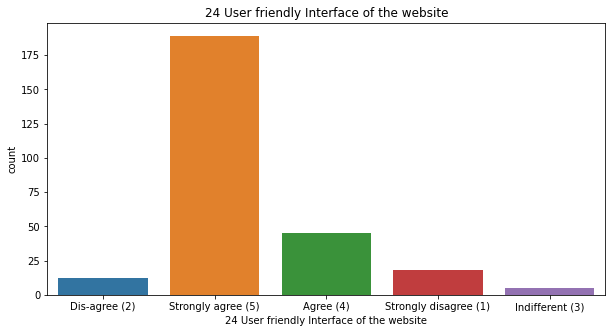

<Figure size 432x288 with 0 Axes>

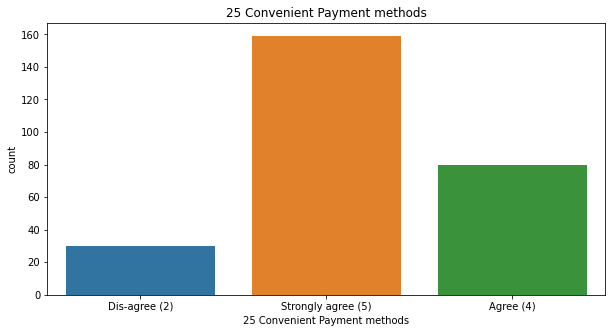

<Figure size 432x288 with 0 Axes>

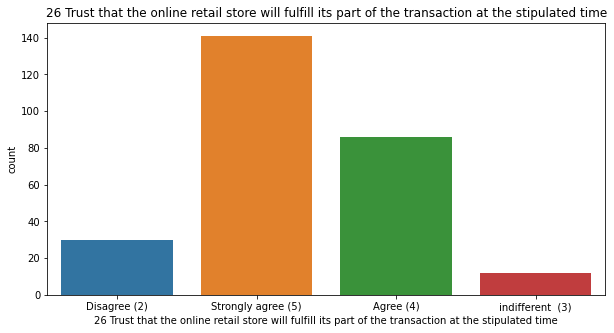

<Figure size 432x288 with 0 Axes>

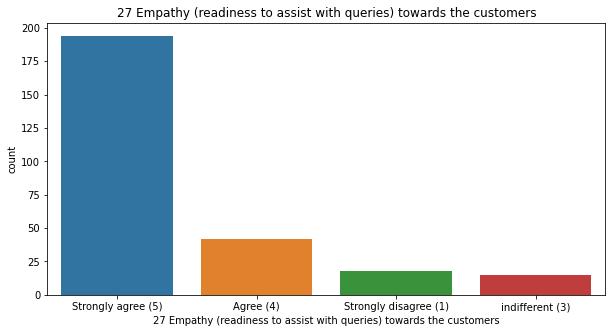

<Figure size 432x288 with 0 Axes>

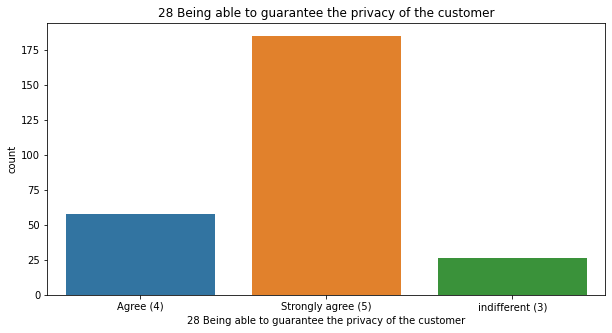

<Figure size 432x288 with 0 Axes>

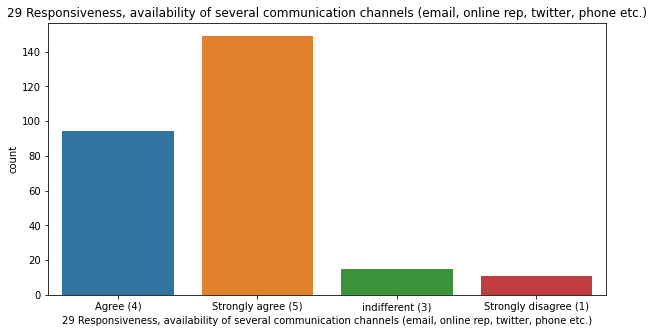

<Figure size 432x288 with 0 Axes>

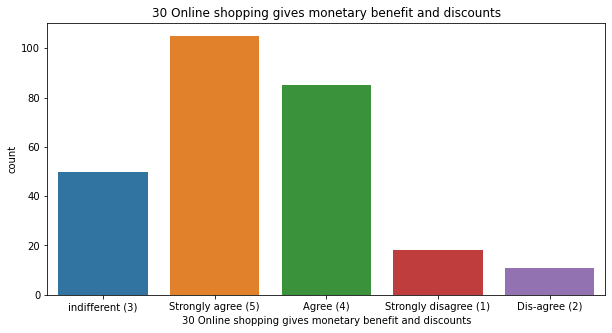

<Figure size 432x288 with 0 Axes>

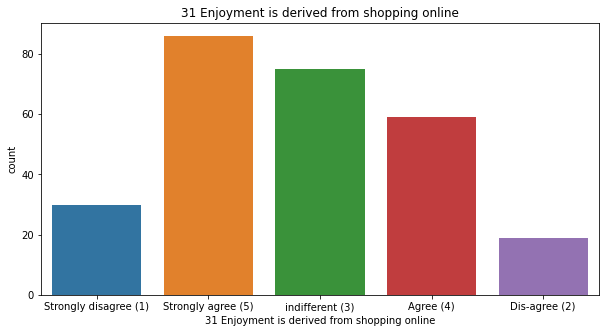

<Figure size 432x288 with 0 Axes>

In [23]:
for i in k2:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()
    plt.tight_layout()

Frequent Online Shoppers strongly recommend:
    Ease of Navigation, High processing speed, user friendly,convenient Payment, Empathy, enjoyment from online shopping

In [24]:
k3=df.columns[30:40]

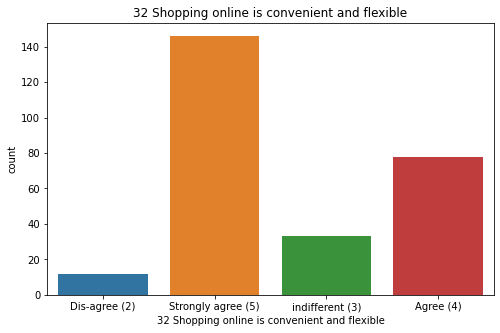

<Figure size 432x288 with 0 Axes>

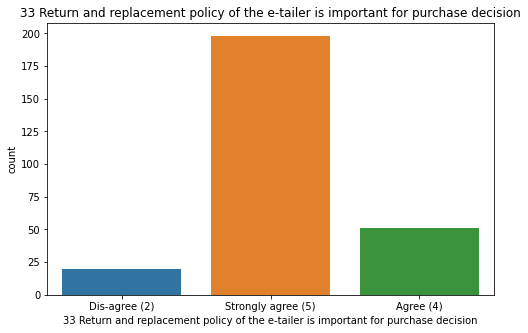

<Figure size 432x288 with 0 Axes>

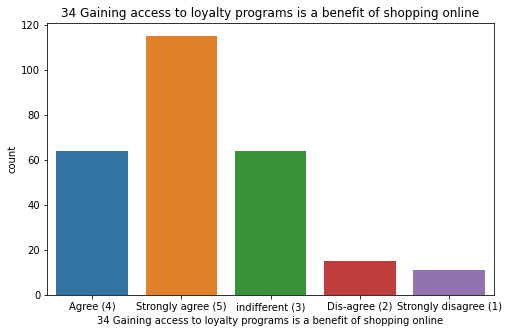

<Figure size 432x288 with 0 Axes>

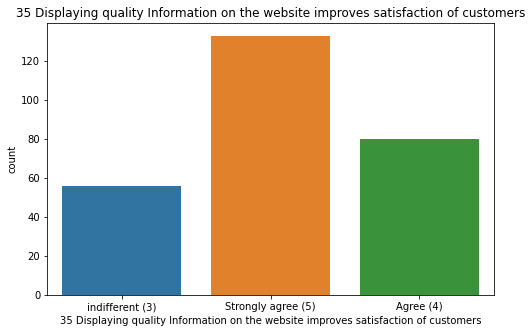

<Figure size 432x288 with 0 Axes>

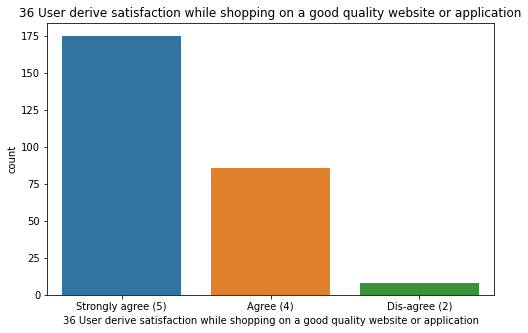

<Figure size 432x288 with 0 Axes>

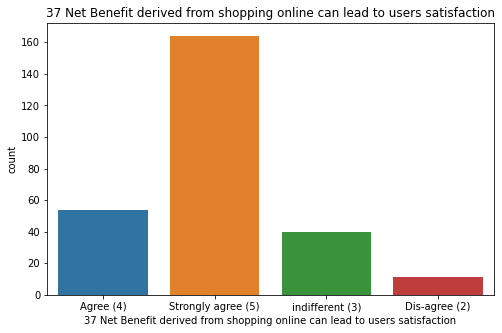

<Figure size 432x288 with 0 Axes>

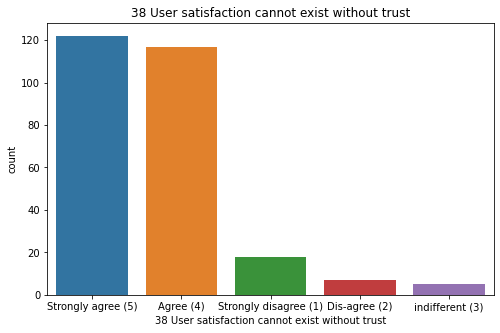

<Figure size 432x288 with 0 Axes>

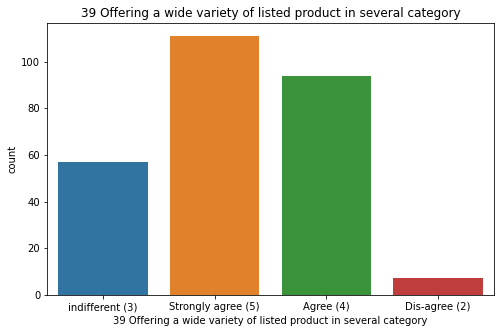

<Figure size 432x288 with 0 Axes>

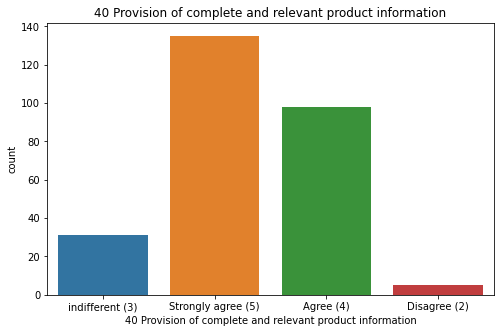

<Figure size 432x288 with 0 Axes>

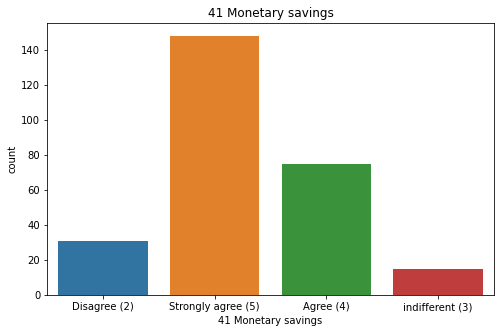

<Figure size 432x288 with 0 Axes>

In [25]:
for i in k3:
    plt.figure(figsize=(8,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()
    plt.tight_layout()

Most people strongly recommend:
    Convenient Shopping, with good returns policy, User satisfaction with trust,Monetary Savings.

In [26]:
k4=df.columns[40:46]

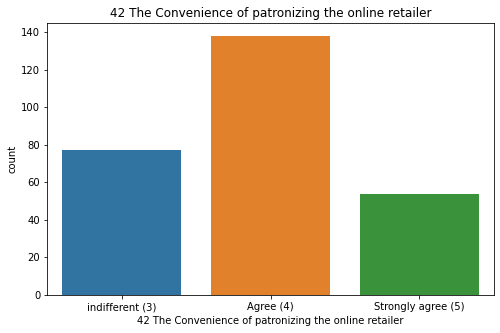

<Figure size 432x288 with 0 Axes>

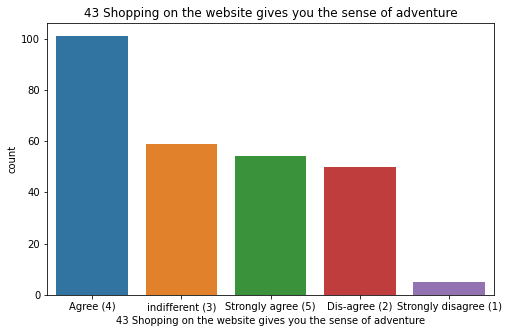

<Figure size 432x288 with 0 Axes>

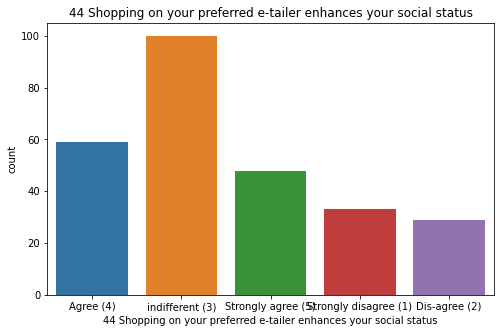

<Figure size 432x288 with 0 Axes>

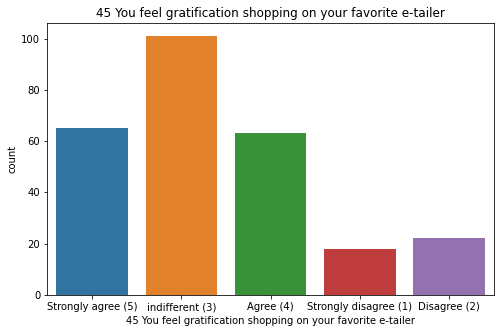

<Figure size 432x288 with 0 Axes>

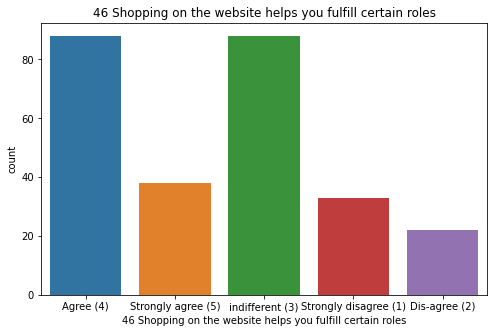

<Figure size 432x288 with 0 Axes>

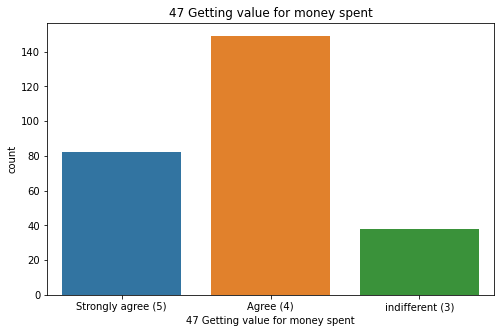

<Figure size 432x288 with 0 Axes>

In [27]:
for i in k4:
    plt.figure(figsize=(8,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()
    plt.tight_layout()

Online shoppers highly recommend Adventourus Shopping, Social status improvement, value for money

In [28]:
m= df.columns[46:70]

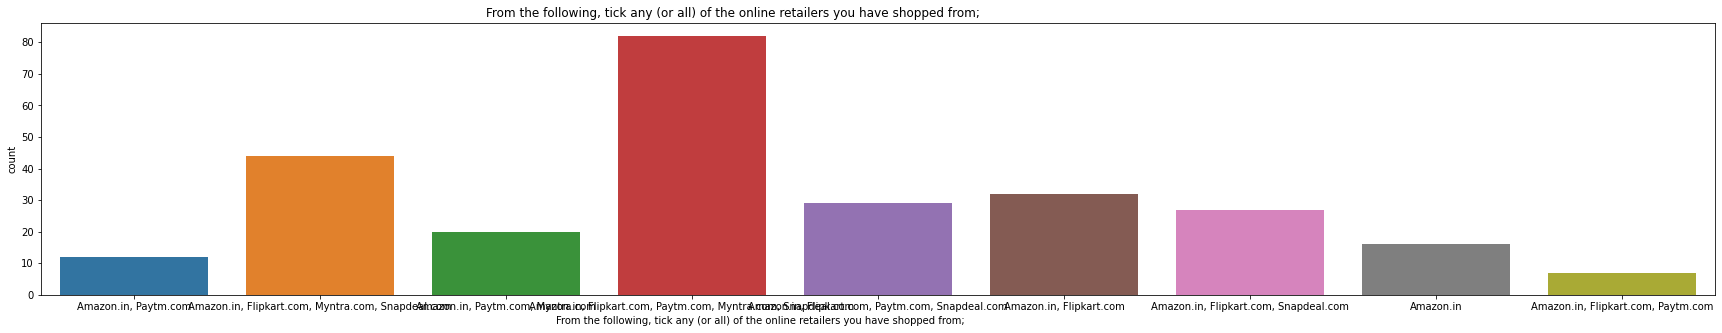

<Figure size 432x288 with 0 Axes>

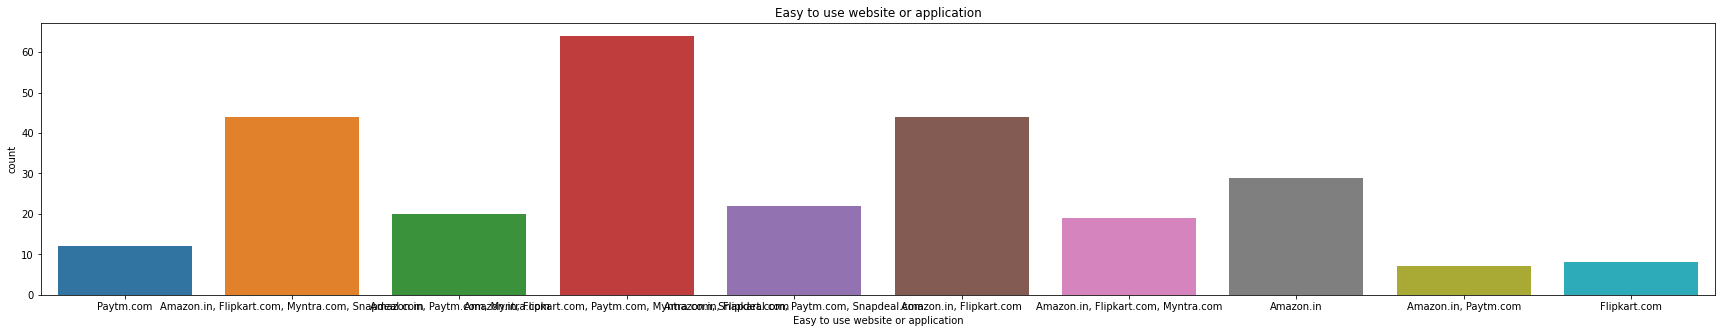

<Figure size 432x288 with 0 Axes>

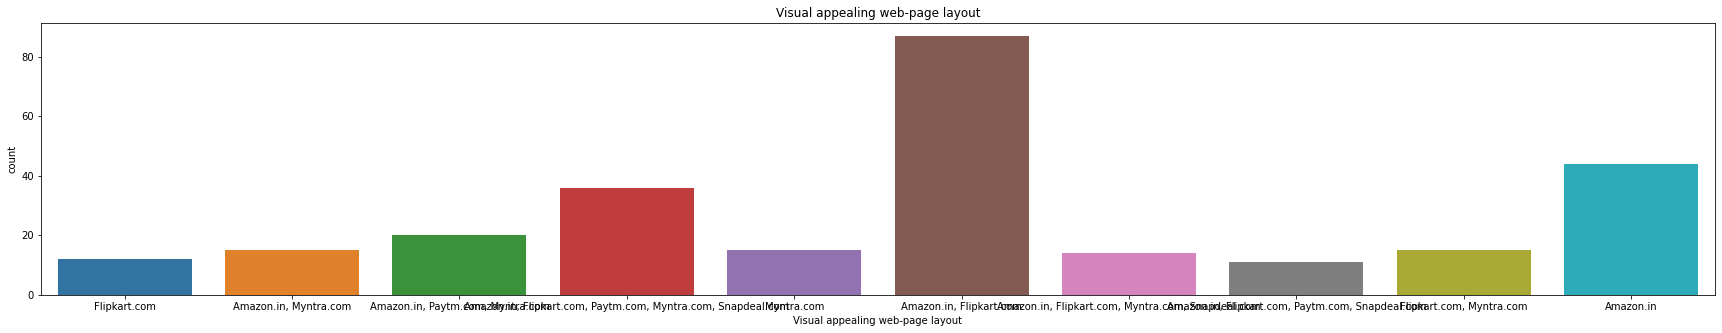

<Figure size 432x288 with 0 Axes>

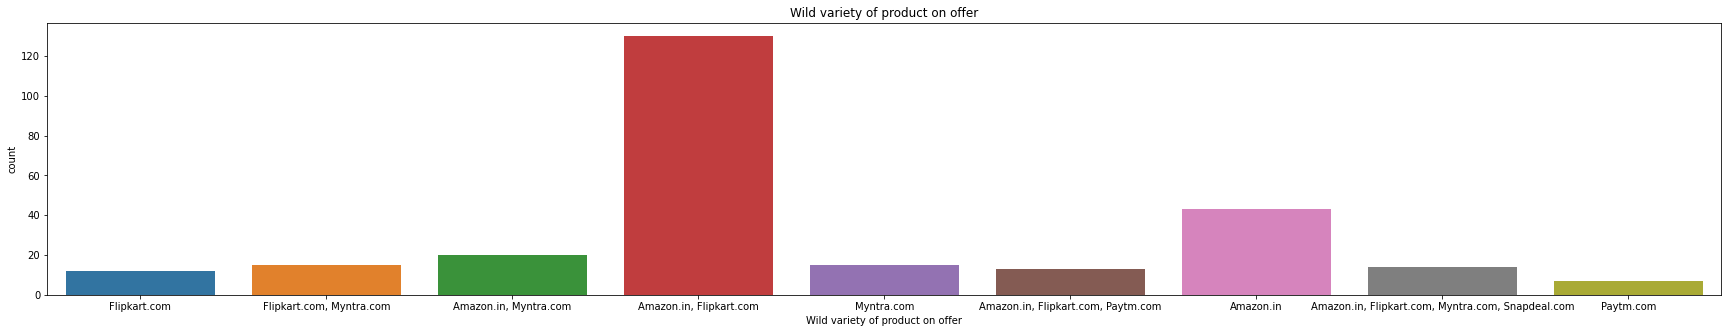

<Figure size 432x288 with 0 Axes>

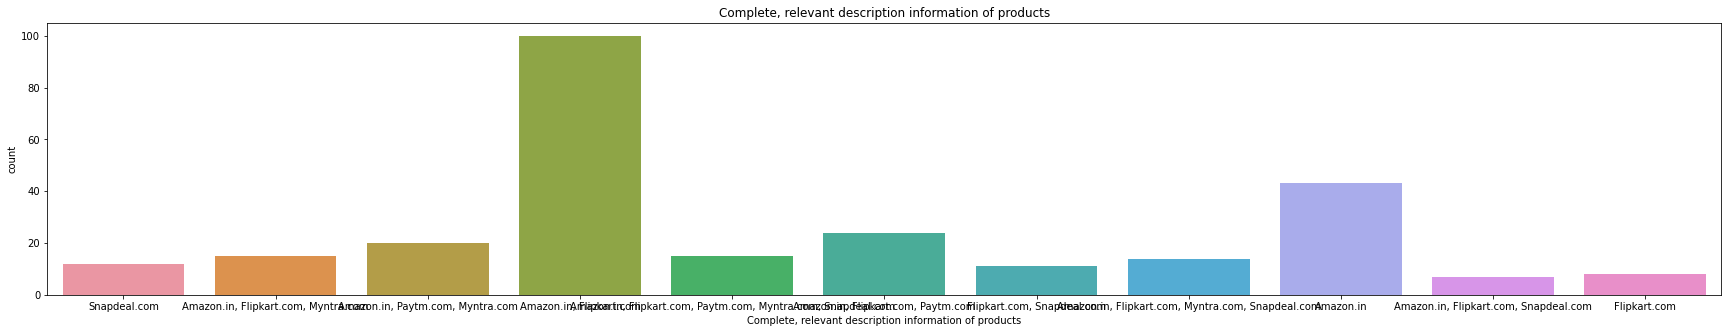

<Figure size 432x288 with 0 Axes>

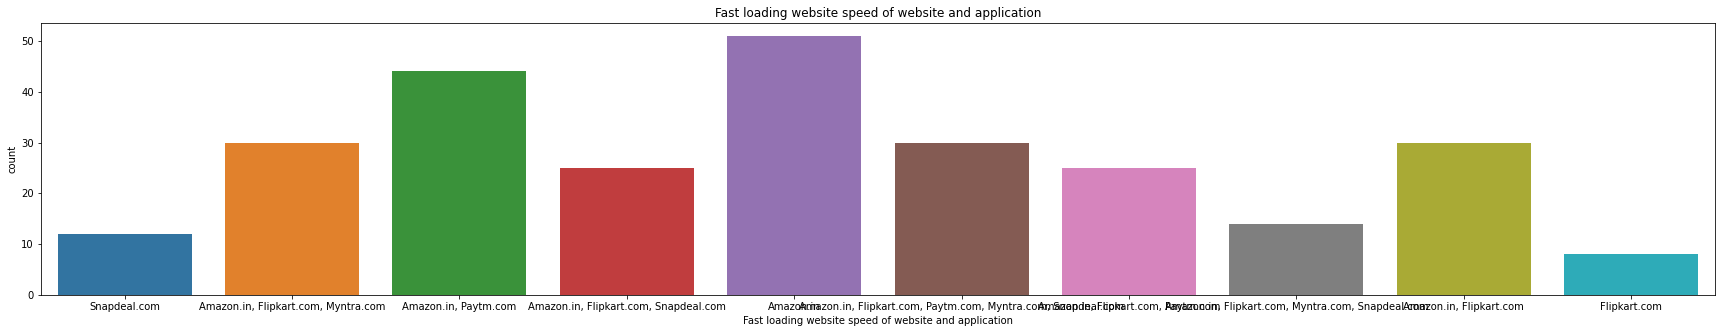

<Figure size 432x288 with 0 Axes>

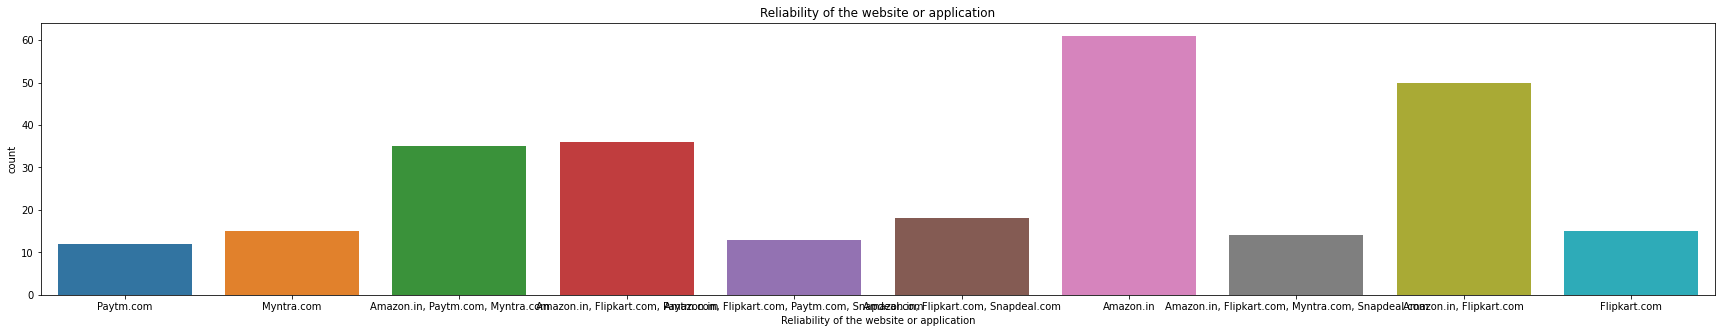

<Figure size 432x288 with 0 Axes>

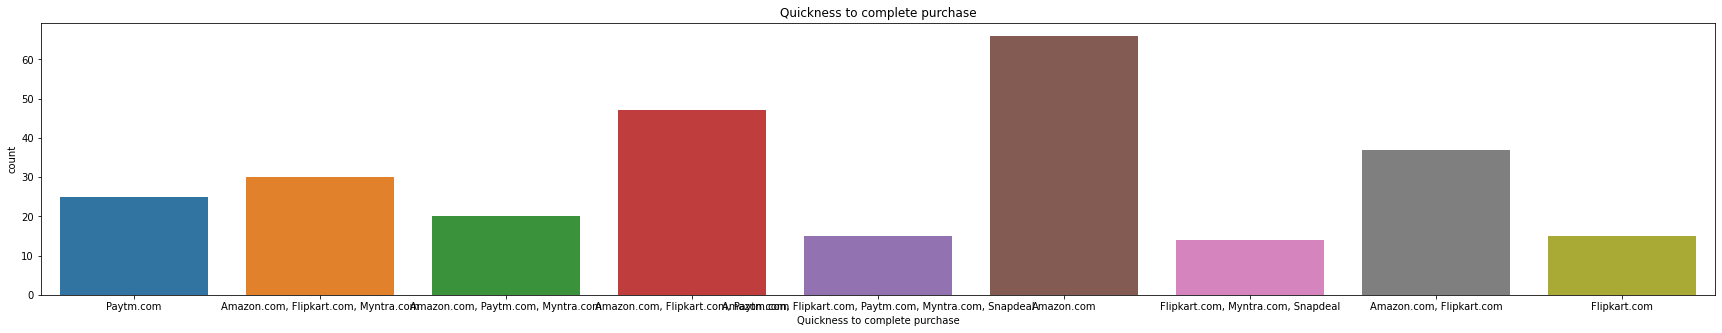

<Figure size 432x288 with 0 Axes>

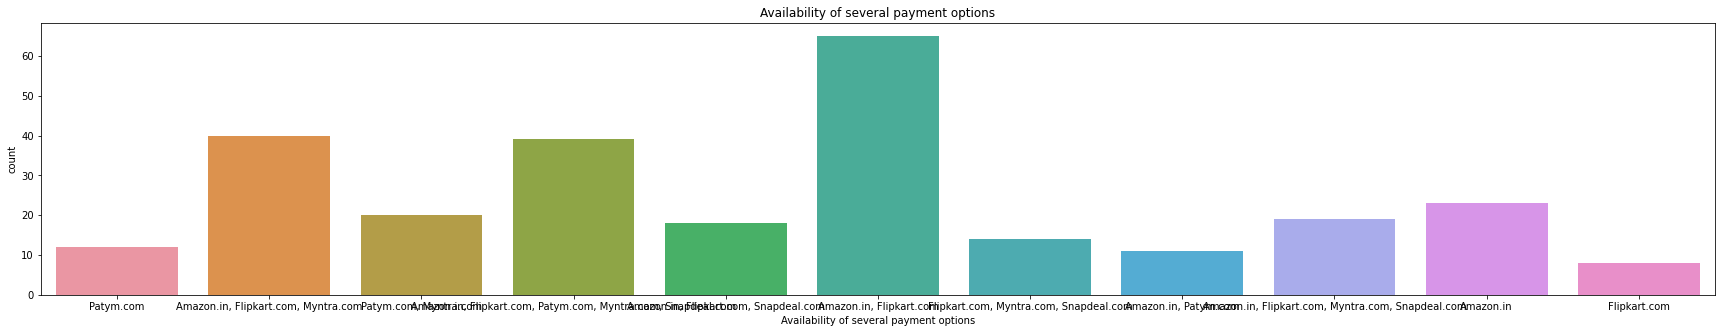

<Figure size 432x288 with 0 Axes>

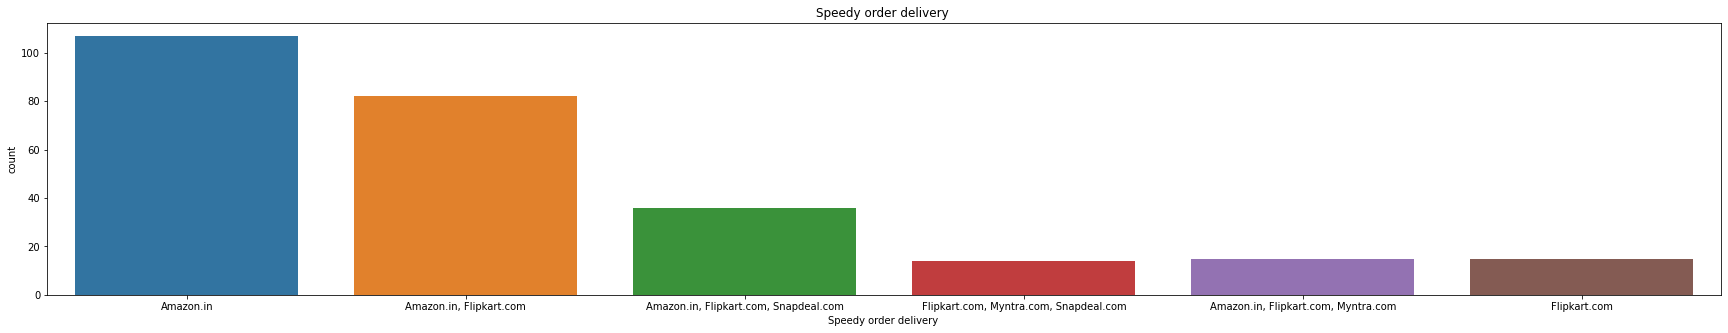

<Figure size 432x288 with 0 Axes>

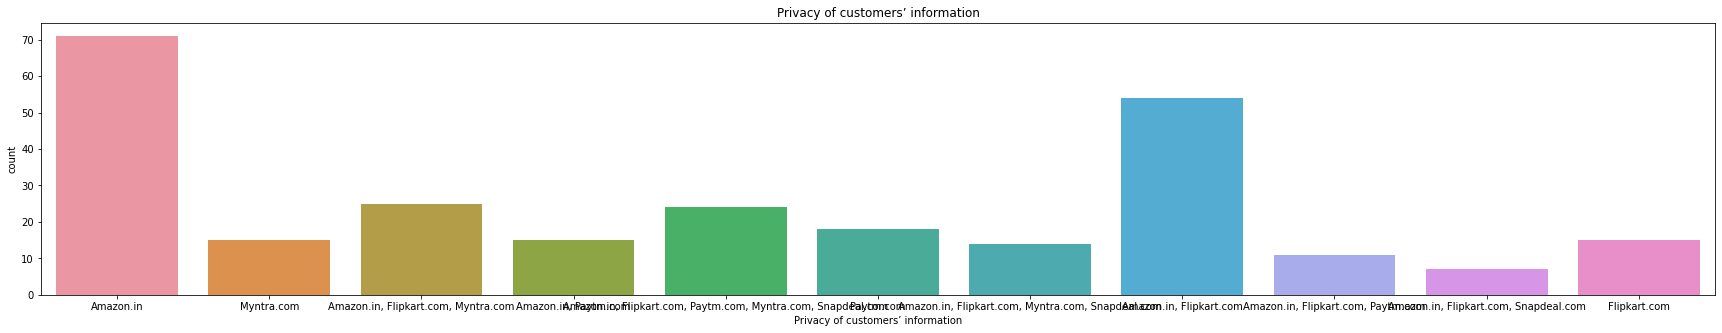

<Figure size 432x288 with 0 Axes>

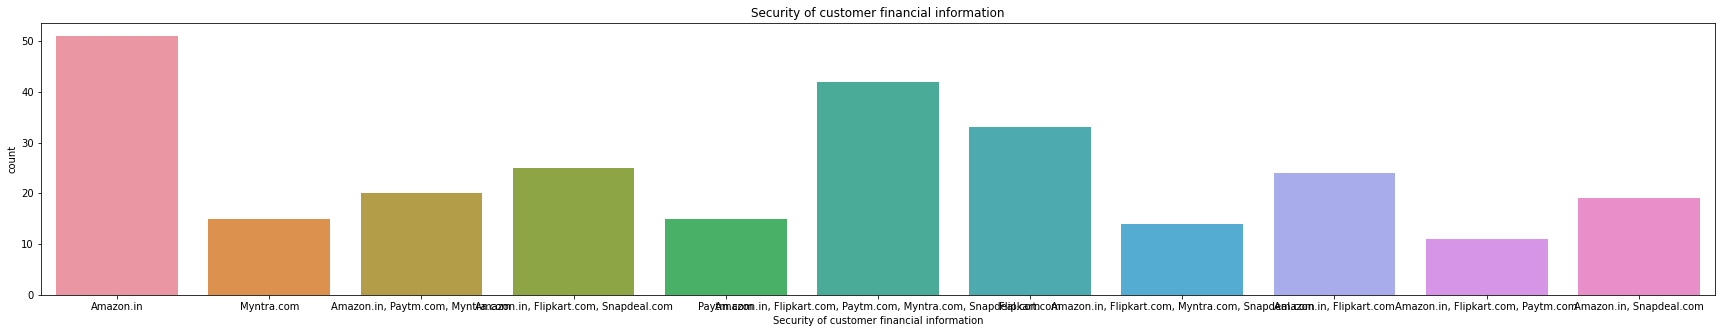

<Figure size 432x288 with 0 Axes>

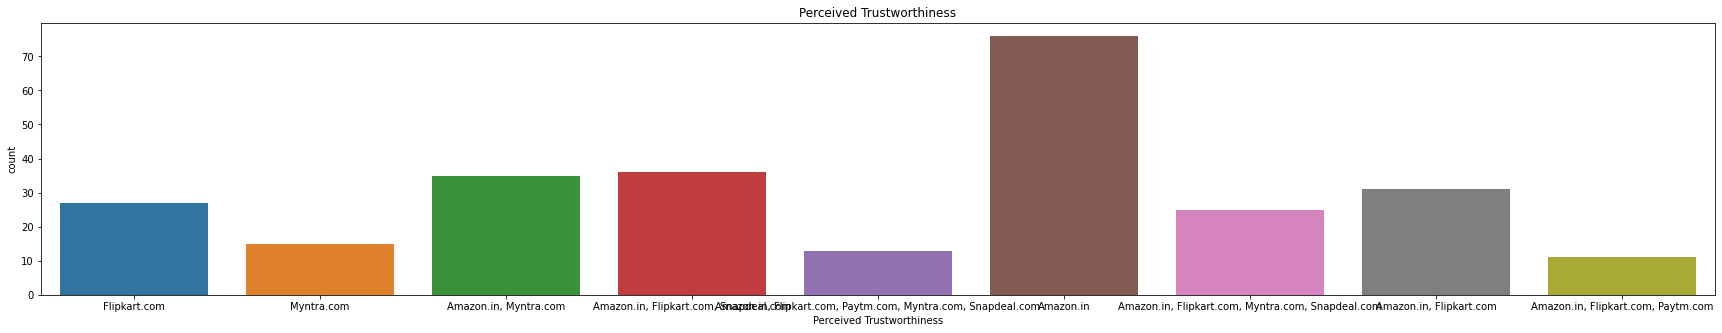

<Figure size 432x288 with 0 Axes>

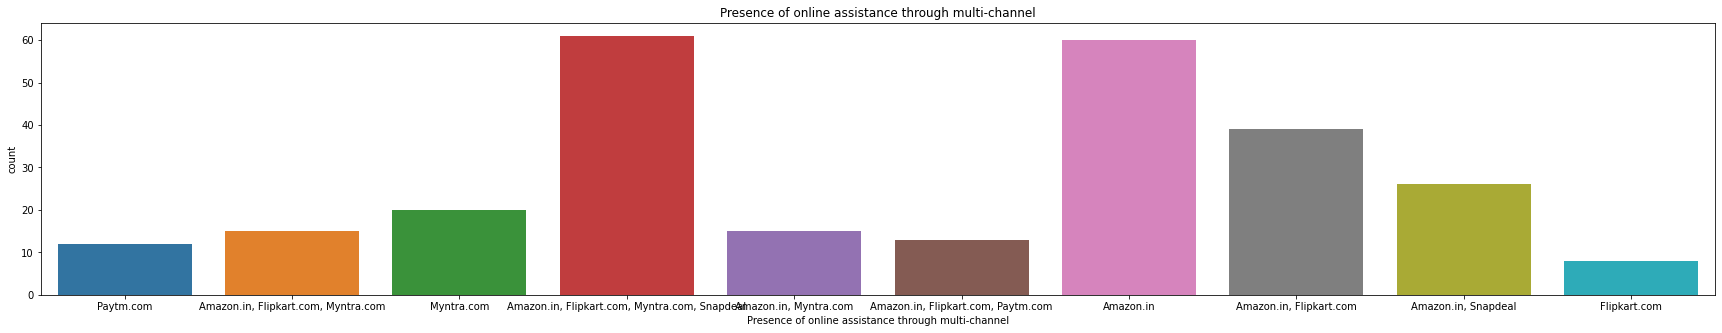

<Figure size 432x288 with 0 Axes>

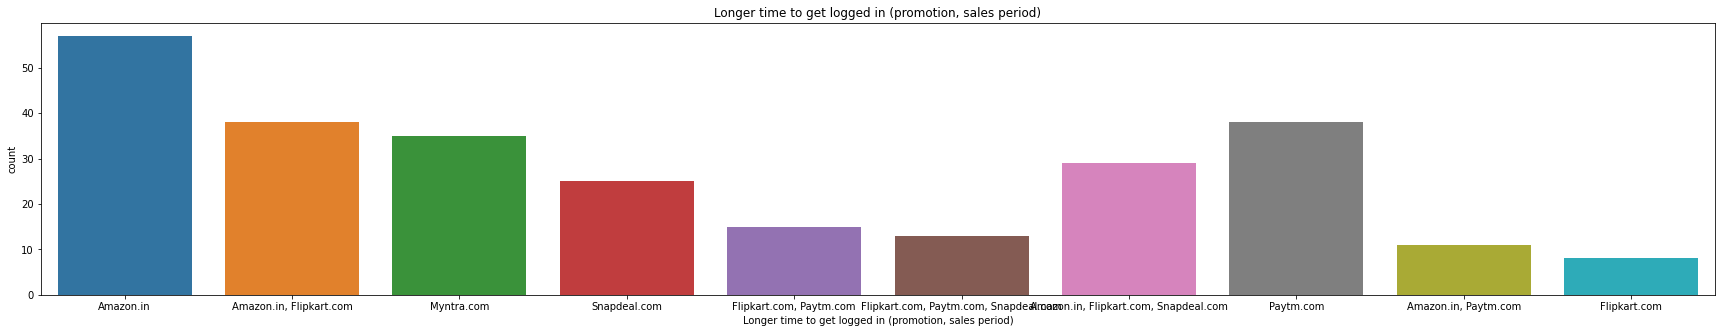

<Figure size 432x288 with 0 Axes>

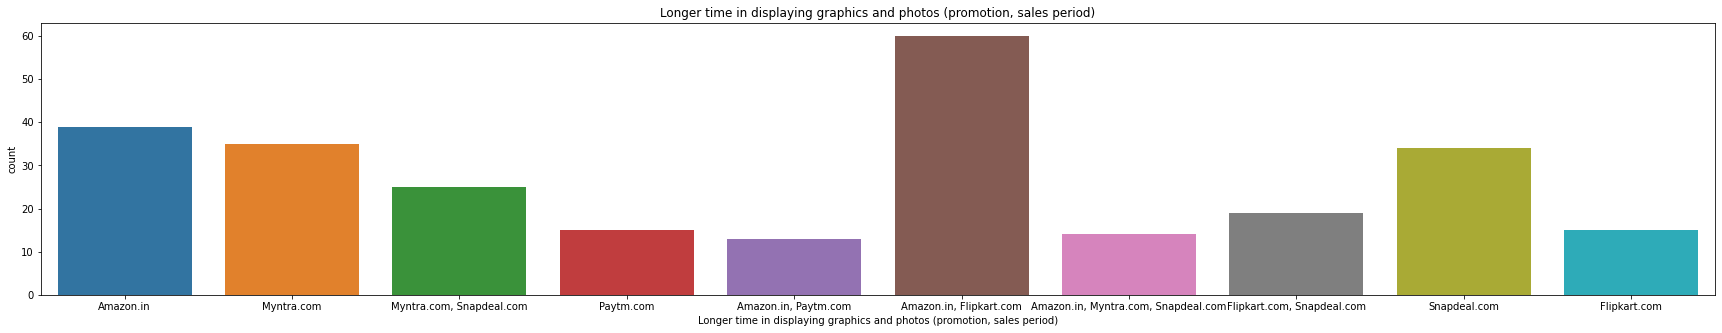

<Figure size 432x288 with 0 Axes>

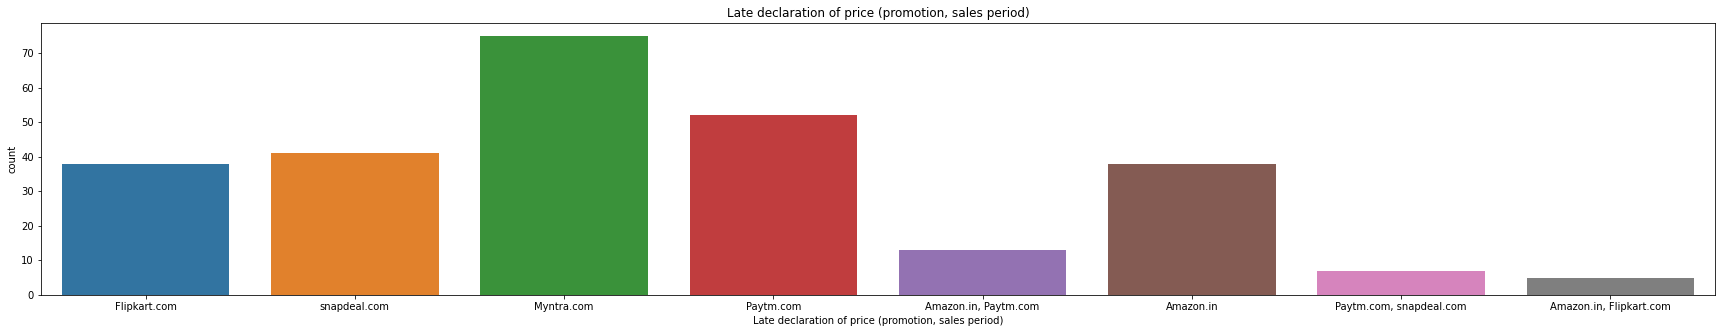

<Figure size 432x288 with 0 Axes>

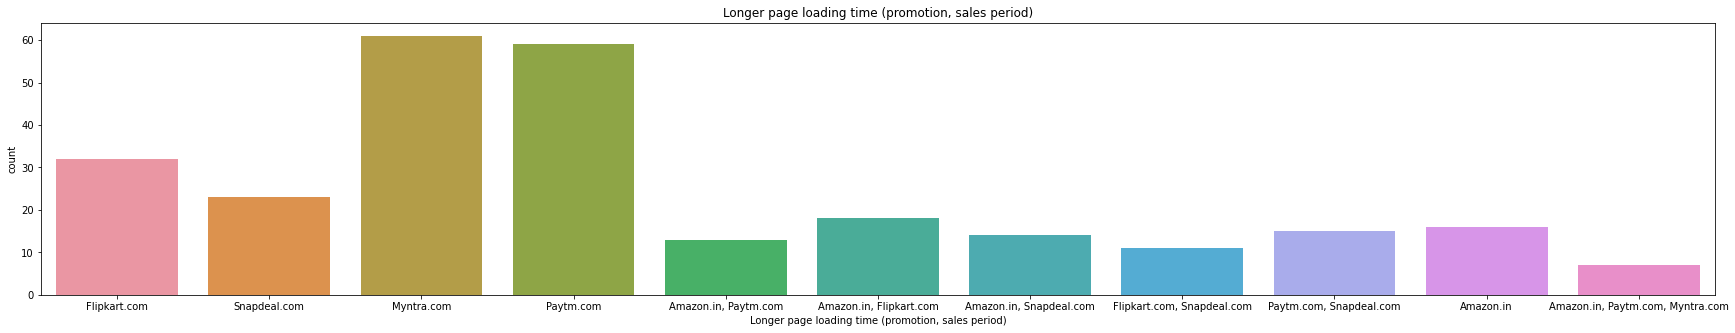

<Figure size 432x288 with 0 Axes>

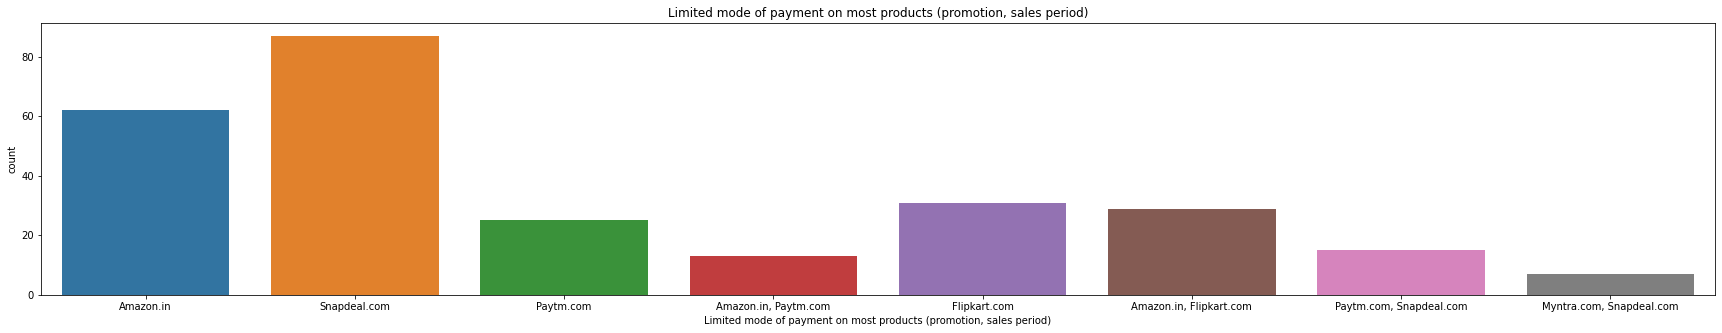

<Figure size 432x288 with 0 Axes>

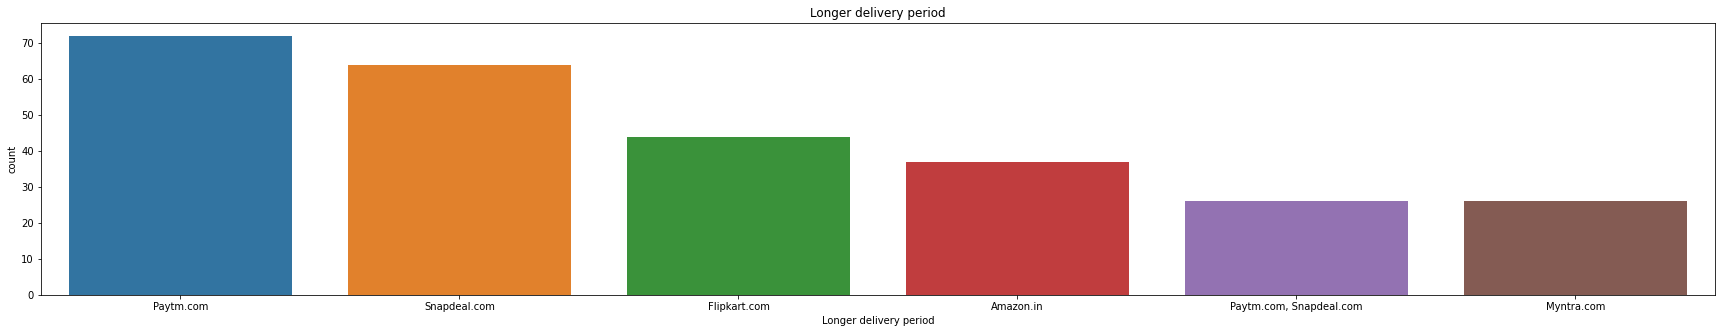

<Figure size 432x288 with 0 Axes>

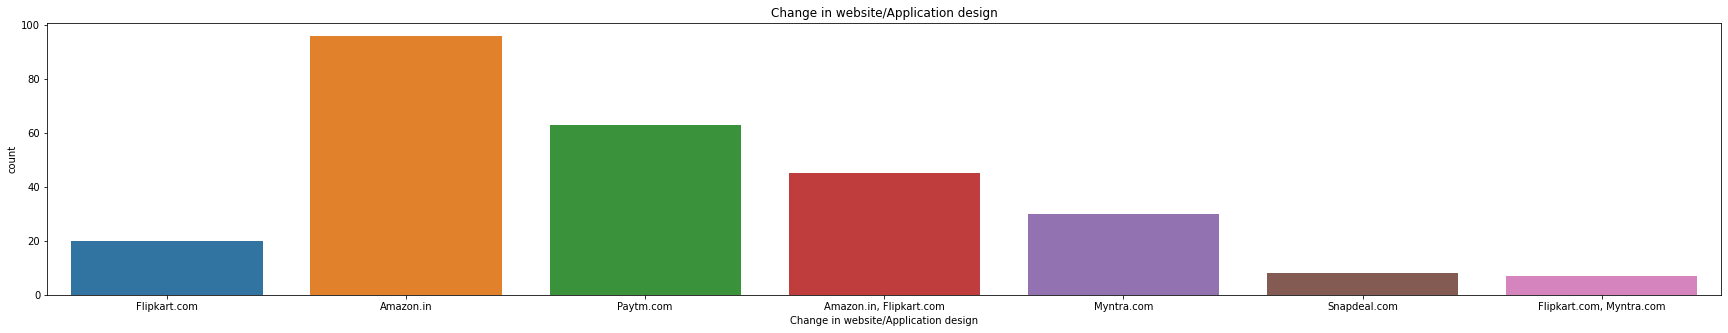

<Figure size 432x288 with 0 Axes>

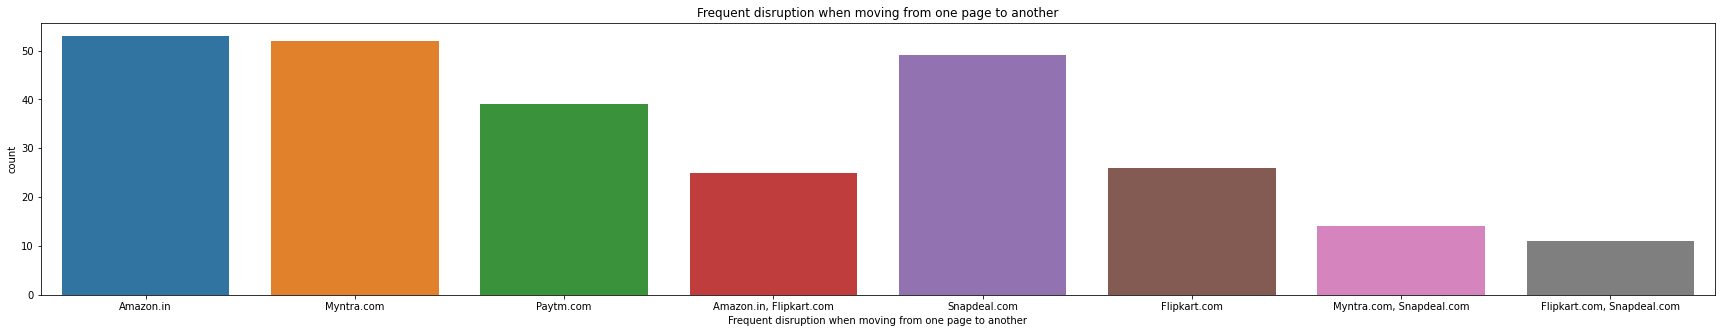

<Figure size 432x288 with 0 Axes>

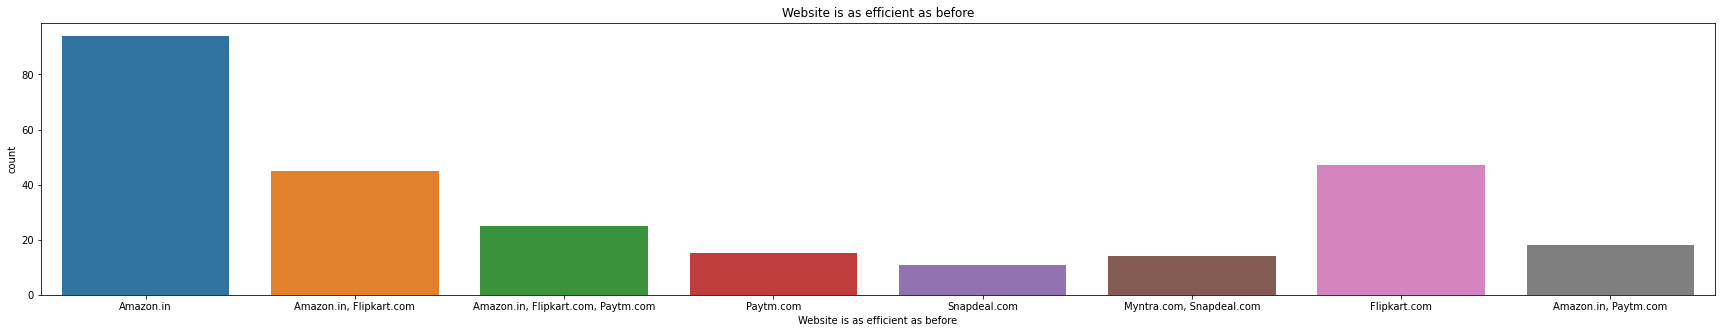

<Figure size 432x288 with 0 Axes>

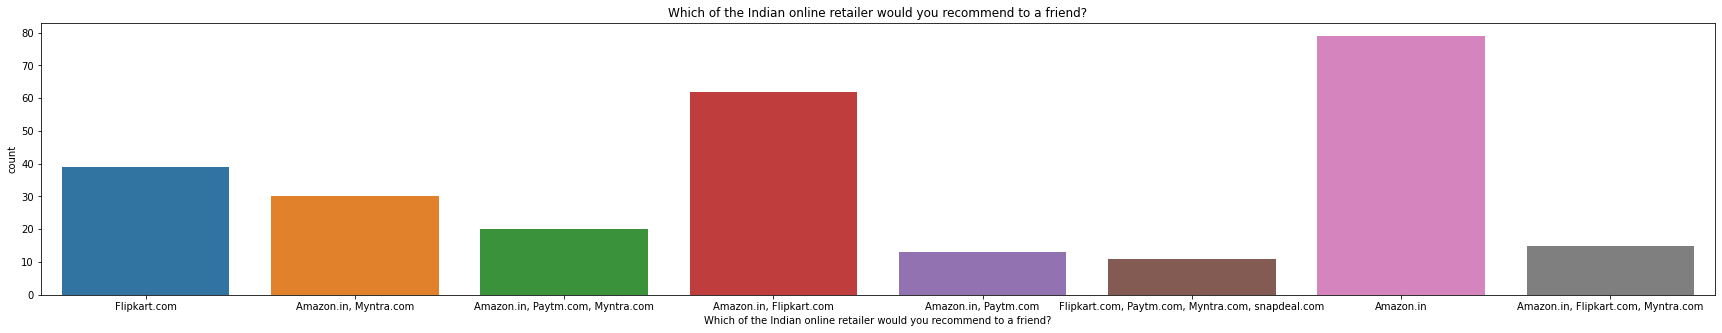

<Figure size 432x288 with 0 Axes>

In [29]:
for i in m:
    plt.figure(figsize=(30,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()
    plt.tight_layout()

From the above insights, certain websites are being recommended by the customers based on different criteria. Mostly amazon.in and other combined websites.

# Encode the Categorical columns

In [30]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [31]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= LE.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df

1Gender of respondent  2 How old are you?   \
0                        1                    1   
1                        0                    0   
2                        0                    0   
3                        1                    0   
4                        0                    0   
..                     ...                  ...   
264                      0                    0   
265                      0                    1   
266                      0                    2   
267                      0                    4   
268                      0                    2   

     3 Which city do you shop online from?  \
0                                        2   
1                                        2   
2                                        4   
3                                        6   
4                                        0   
..                                     ...   
264                                     10   
265                                      3   
266                                      0   
267                                     10   
268                                      3   

     5 Since How Long You are Shopping Online ?  \
0                                             3   
1                                             3   
2                                             2   
3                                             2   
4                                             1   
..                                          ...   
264                                           0   
265                                           0   
266                                           1   
267                                           1   
268                                           1   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    2                       
1                                                    3                       
2                                                    3                       
3                                                    5                       
4                                                    0                       
..                                                 ...                       
264                                                  5                       
265                                                  2                       
266                                                  5                       
267                                                  5                       
268                                                  2                       

     7 How do you access the internet while shopping on-line?  \
0                                                    0          
1                                                    3          
2                                                    1          
3                                                    1          
4                                                    3          
..                                                 ...          
264                                                  1          
265                                                  1          
266                                                  2          
267                                                  3          
268                                                  1          

     8 Which device do you use to access the online shopping?  \
0                                                    0          
1                                                    2          
2                                                    2          
3                                                    2          
4                                                    2          
..                                                 ...          
264                                                  

In [33]:
pd.set_option('display.max_columns',None)

In [34]:
df

1Gender of respondent  2 How old are you?   \
0                        1                    1   
1                        0                    0   
2                        0                    0   
3                        1                    0   
4                        0                    0   
..                     ...                  ...   
264                      0                    0   
265                      0                    1   
266                      0                    2   
267                      0                    4   
268                      0                    2   

     3 Which city do you shop online from?  \
0                                        2   
1                                        2   
2                                        4   
3                                        6   
4                                        0   
..                                     ...   
264                                     10   
265                                      3   
266                                      0   
267                                     10   
268                                      3   

     5 Since How Long You are Shopping Online ?  \
0                                             3   
1                                             3   
2                                             2   
3                                             2   
4                                             1   
..                                          ...   
264                                           0   
265                                           0   
266                                           1   
267                                           1   
268                                           1   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    2                       
1                                                    3                       
2                                                    3                       
3                                                    5                       
4                                                    0                       
..                                                 ...                       
264                                                  5                       
265                                                  2                       
266                                                  5                       
267                                                  5                       
268                                                  2                       

     7 How do you access the internet while shopping on-line?  \
0                                                    0          
1                                                    3          
2                                                    1          
3                                                    1          
4                                                    3          
..                                                 ...          
264                                                  1          
265                                                  1          
266                                                  2          
267                                                  3          
268                                                  1          

     8 Which device do you use to access the online shopping?  \
0                                                    0          
1                                                    2          
2                                                    2          
3                                                    2          
4                                                    2          
..                                                 ...          
264                                                  

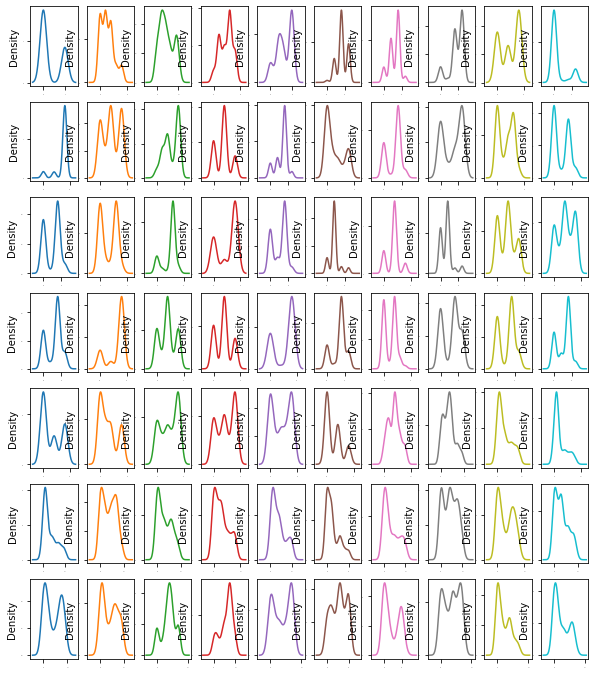

In [35]:
df.plot(kind='density', subplots=True, layout=(7,10), sharex=False, legend=False, fontsize=1,figsize=(10,12))
plt.show()

The plots shows the density distribution of each variable. 

# Data Description

In [36]:
df.describe()

1Gender of respondent  2 How old are you?   \
count             269.000000           269.000000   
mean                0.327138             1.330855   
std                 0.470042             1.183774   
min                 0.000000             0.000000   
25%                 0.000000             0.000000   
50%                 0.000000             1.000000   
75%                 1.000000             2.000000   
max                 1.000000             4.000000   

       3 Which city do you shop online from?  \
count                             269.000000   
mean                                4.494424   
std                                 3.187687   
min                                 0.000000   
25%                                 2.000000   
50%                                 4.000000   
75%                                 7.000000   
max                                10.000000   

       5 Since How Long You are Shopping Online ?  \
count                                  269.000000   
mean                                     2.323420   
std                                      1.176357   
min                                      0.000000   
25%                                      1.000000   
50%                                      3.000000   
75%                                      3.000000   
max                                      4.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         269.000000                       
mean                                            3.237918                       
std                                             1.739331                       
min                                             0.000000                       
25%                                             2.000000                       
50%                                             3.000000                       
75%                                             5.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         269.000000          
mean                                            2.078067          
std                                             0.715919          
min                                             0.000000          
25%                                             2.000000          
50%                                             2.000000          
75%                                             3.000000          
max                                             3.000000          

       8 Which device do you use to access the online shopping?  \
count                                         269.000000          
mean                                            1.501859          
std                                             0.751240          
min                                             0.000000          
25%                                             1.000000          
50%                                             2.000000          
75%                                             2.000000          
max                                             3.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
count                                         269.000000                                                      
mean                                            2.256506                                                      
std                                             0.944942                                                      
min                                             0.000000                                                      
25%                                             2.000000                                                      
50%                    

In certain columns, the mean values are deviated much from the median showing the presence of skewness.

In some columns the values of 75th percentile and maximum values are more indicating the presence of outliers

# TO Find The Correlation

In [37]:
df.corr()


1Gender of respondent  \
1Gender of respondent                                            1.000000   
2 How old are you?                                               0.046169   
3 Which city do you shop online from?                            0.080912   
5 Since How Long You are Shopping Online ?                      -0.057096   
6 How many times you have made an online purcha...               0.077876   
...                                                                   ...   
Longer delivery period                                           0.060838   
Change in website/Application design                            -0.164818   
Frequent disruption when moving from one page t...              -0.256638   
Website is as efficient as before                                0.055663   
Which of the Indian online retailer would you r...              -0.003372   

                                                    2 How old are you?   \
1Gender of respondent                                          0.046169   
2 How old are you?                                             1.000000   
3 Which city do you shop online from?                          0.113712   
5 Since How Long You are Shopping Online ?                    -0.087847   
6 How many times you have made an online purcha...             0.309575   
...                                                                 ...   
Longer delivery period                                        -0.156173   
Change in website/Application design                          -0.134558   
Frequent disruption when moving from one page t...            -0.018825   
Website is as efficient as before                             -0.008582   
Which of the Indian online retailer would you r...            -0.135263   

                                                    3 Which city do you shop online from?  \
1Gender of respondent                                                            0.080912   
2 How old are you?                                                               0.113712   
3 Which city do you shop online from?                                            1.000000   
5 Since How Long You are Shopping Online ?                                      -0.138329   
6 How many times you have made an online purcha...                               0.173871   
...                                                                                   ...   
Longer delivery period                                                          -0.123369   
Change in website/Application design                                             0.000427   
Frequent disruption when moving from one page t...                               0.019167   
Website is as efficient as before                                                0.007117   
Which of the Indian online retailer would you r...                              -0.142123   

                                                    5 Since How Long You are Shopping Online ?  \
1Gender of respondent                                                                -0.057096   
2 How old are you?                                                                   -0.087847   
3 Which city do you shop online from?                                                -0.138329   
5 Since How Long You are Shopping Online ?                                            1.000000   
6 How many times you have made an online purcha...                                    0.013315   
...                                                                                        ...   
Longer delivery period                                                                0.218641   
Change in website/Application design                                                  0.220347   
Frequent disruption when moving from one page t...                                    0.025919   
Website is as efficient as before                                                    -0.024316   
Which of the Indian online reta

<AxesSubplot:>

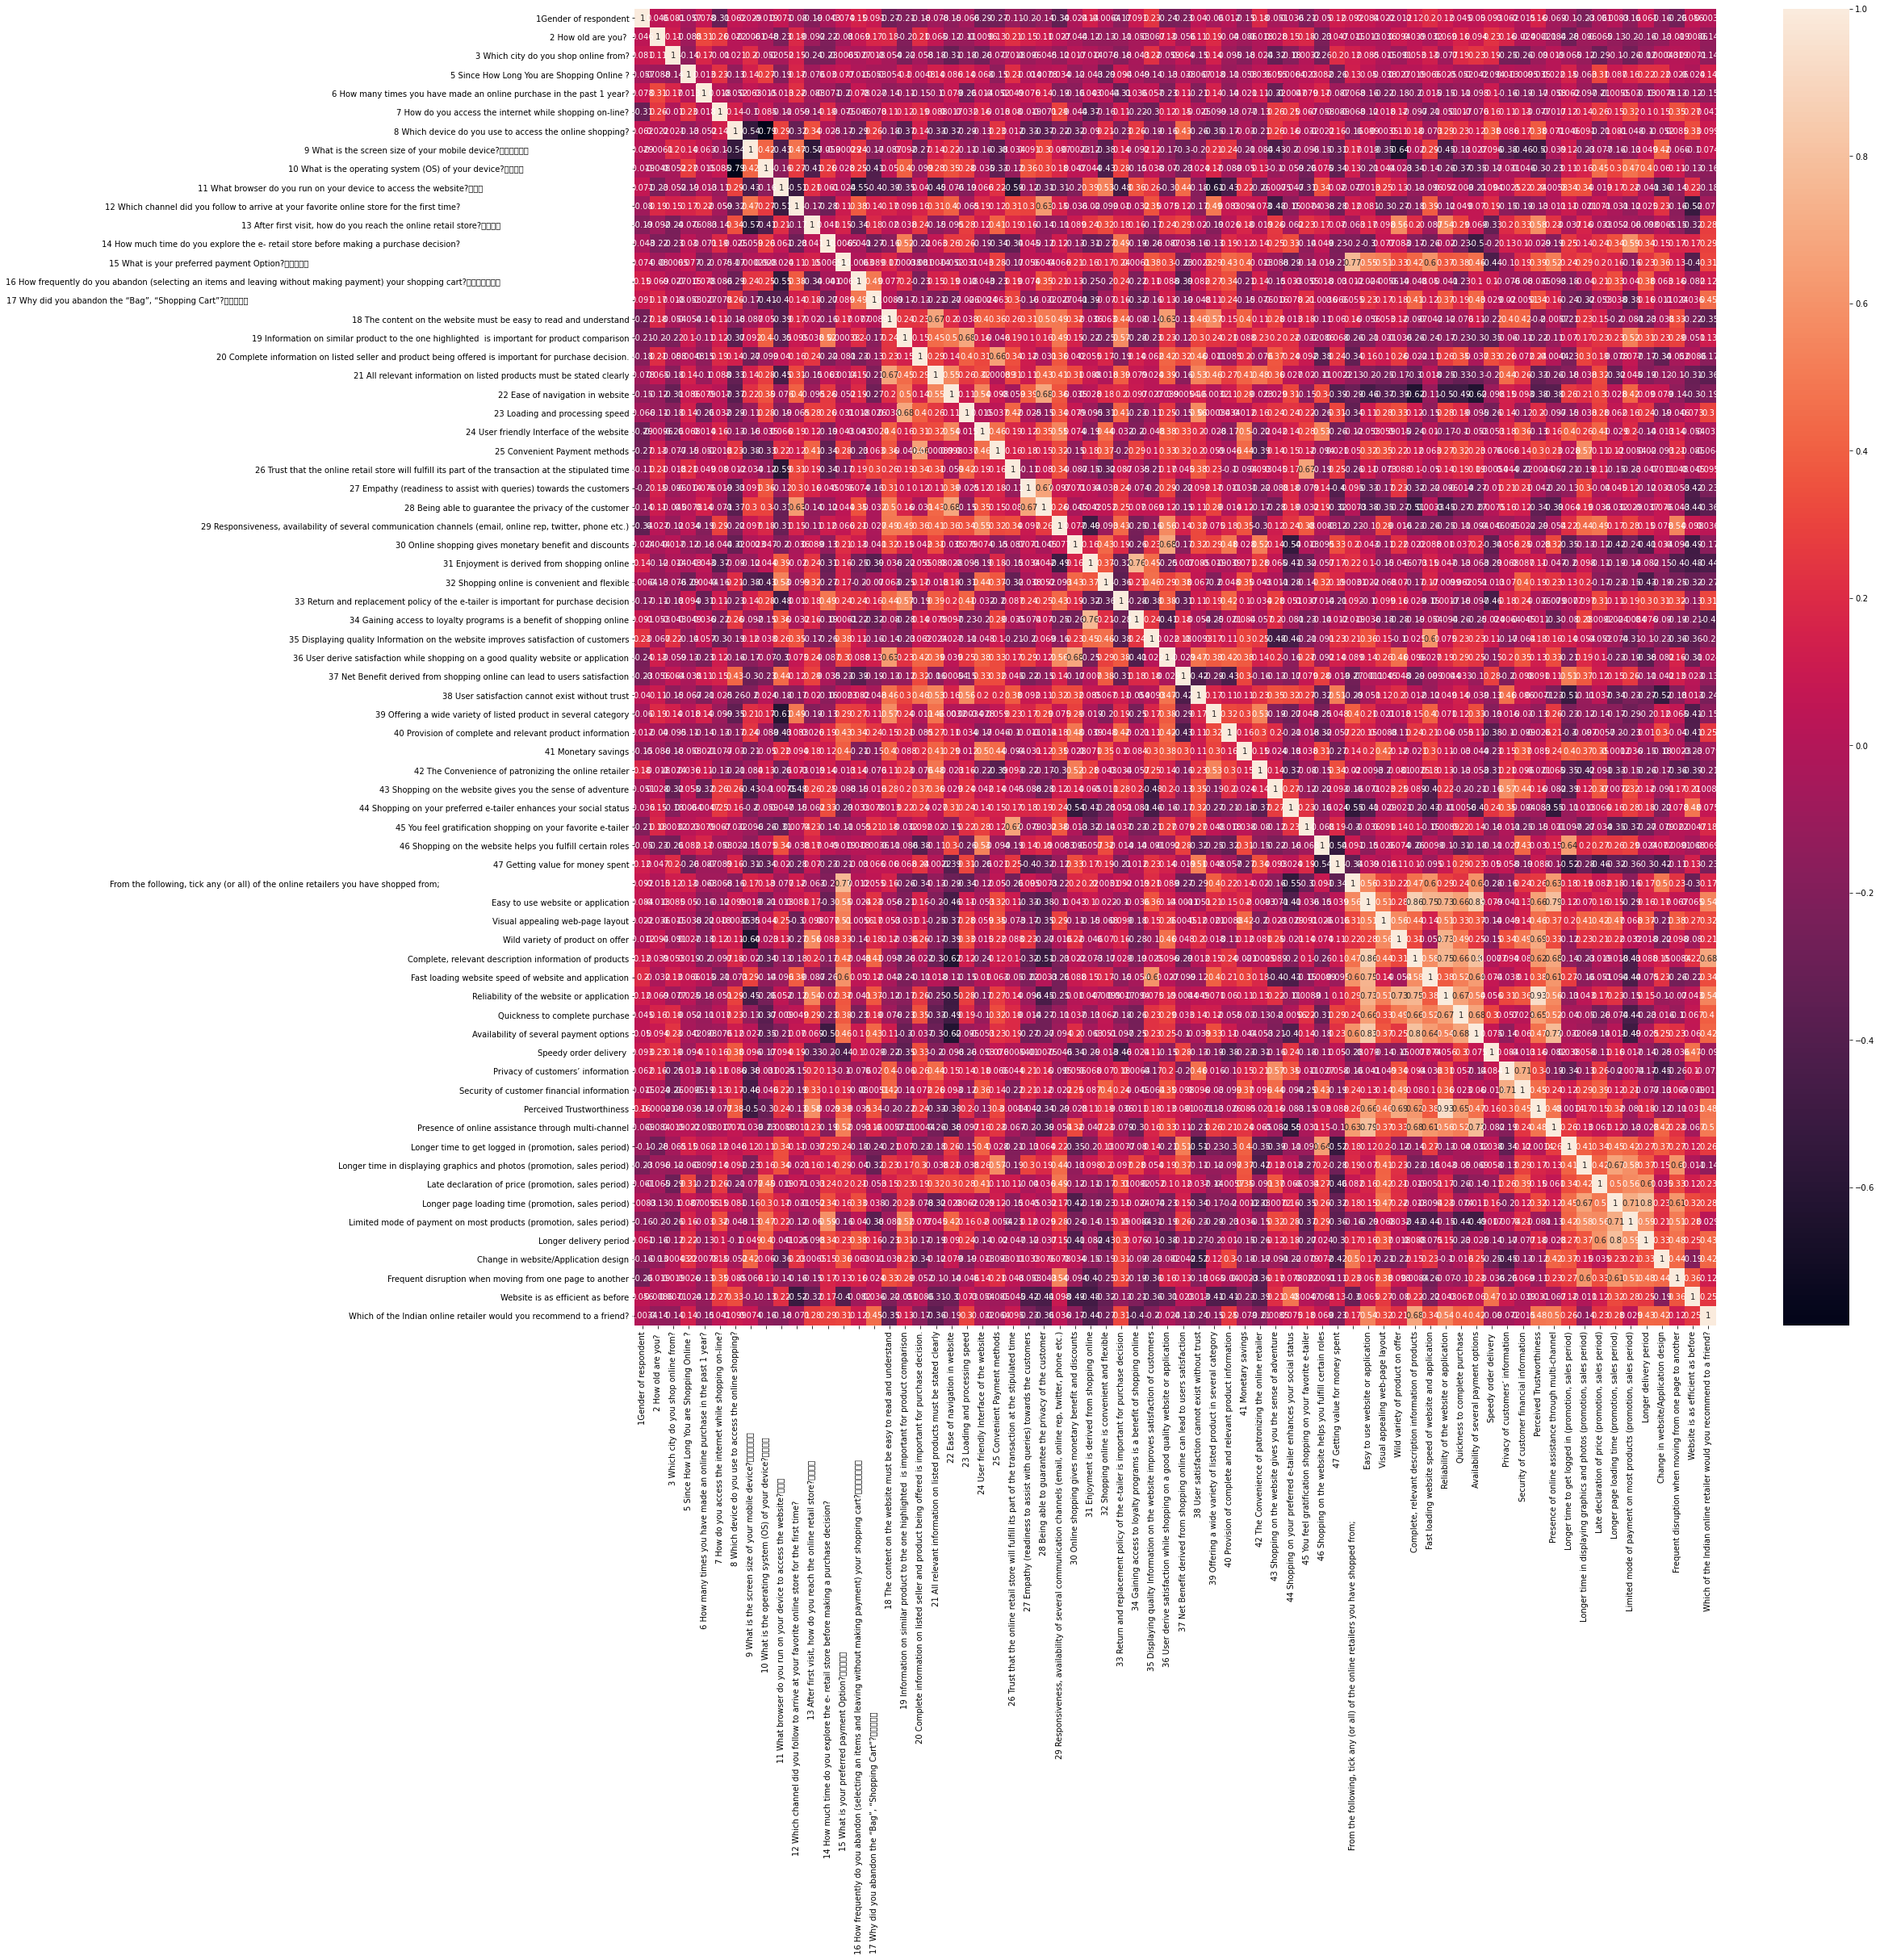

In [39]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

# Check For Multi Collinearity- VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
df1=df.iloc[:,0:-1]
df1

1Gender of respondent  2 How old are you?   \
0                        1                    1   
1                        0                    0   
2                        0                    0   
3                        1                    0   
4                        0                    0   
..                     ...                  ...   
264                      0                    0   
265                      0                    1   
266                      0                    2   
267                      0                    4   
268                      0                    2   

     3 Which city do you shop online from?  \
0                                        2   
1                                        2   
2                                        4   
3                                        6   
4                                        0   
..                                     ...   
264                                     10   
265                                      3   
266                                      0   
267                                     10   
268                                      3   

     5 Since How Long You are Shopping Online ?  \
0                                             3   
1                                             3   
2                                             2   
3                                             2   
4                                             1   
..                                          ...   
264                                           0   
265                                           0   
266                                           1   
267                                           1   
268                                           1   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    2                       
1                                                    3                       
2                                                    3                       
3                                                    5                       
4                                                    0                       
..                                                 ...                       
264                                                  5                       
265                                                  2                       
266                                                  5                       
267                                                  5                       
268                                                  2                       

     7 How do you access the internet while shopping on-line?  \
0                                                    0          
1                                                    3          
2                                                    1          
3                                                    1          
4                                                    3          
..                                                 ...          
264                                                  1          
265                                                  1          
266                                                  2          
267                                                  3          
268                                                  1          

     8 Which device do you use to access the online shopping?  \
0                                                    0          
1                                                    2          
2                                                    2          
3                                                    2          
4                                                    2          
..                                                 ...          
264                                                  

In [40]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [41]:
b=vif_fun()
b

vif_factor                                           features
0     2.060121                              1Gender of respondent
1     1.881707                                2 How old are you? 
2     1.691944              3 Which city do you shop online from?
3     1.699169         5 Since How Long You are Shopping Online ?
4     2.085208  6 How many times you have made an online purch...
..         ...                                                ...
64         inf  Limited mode of payment on most products (prom...
65         inf                             Longer delivery period
66         inf               Change in website/Application design
67         inf  Frequent disruption when moving from one page ...
68         inf                  Website is as efficient as before

[69 rows x 2 columns]

In [42]:
display(b.to_string())

'    vif_factor                                                                                                                                                                                                             features\n0     2.060121                                                                                                                                                                                                1Gender of respondent\n1     1.881707                                                                                                                                                                                                  2 How old are you? \n2     1.691944                                                                                                                                                                                3 Which city do you shop online from?\n3     1.699169                                                                     

Most columns have VIF infinity, this means these columns are highly correlated to each other.
So we will reduce the columns by dropping it by comparing with the correlation with the target variable

In [43]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                   

# Drop The Columns

In [44]:
df1= df.drop(['6 How many times you have made an online purchase in the past 1 year?',
        '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
        '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
        '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
        '18 The content on the website must be easy to read and understand',
        '22 Ease of navigation in website',
        '25 Convenient Payment methods',
        '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
        '31 Enjoyment is derived from shopping online',
        '34 Gaining access to loyalty programs is a benefit of shopping online',
        '35 Displaying quality Information on the website improves satisfaction of customers',
        '39 Offering a wide variety of listed product in several category',
        '40 Provision of complete and relevant product information',
        '41 Monetary savings',
        '45 You feel gratification shopping on your favorite e-tailer',
        '46 Shopping on the website helps you fulfill certain roles',
        'Privacy of customers’ information',
        'Security of customer financial information',
        'Longer time in displaying graphics and photos (promotion, sales period)',
        'Limited mode of payment on most products (promotion, sales period)',
        'Longer delivery period',
        'Frequent disruption when moving from one page to another'],axis=1)

In [45]:
df1

1Gender of respondent  2 How old are you?   \
0                        1                    1   
1                        0                    0   
2                        0                    0   
3                        1                    0   
4                        0                    0   
..                     ...                  ...   
264                      0                    0   
265                      0                    1   
266                      0                    2   
267                      0                    4   
268                      0                    2   

     3 Which city do you shop online from?  \
0                                        2   
1                                        2   
2                                        4   
3                                        6   
4                                        0   
..                                     ...   
264                                     10   
265                                      3   
266                                      0   
267                                     10   
268                                      3   

     5 Since How Long You are Shopping Online ?  \
0                                             3   
1                                             3   
2                                             2   
3                                             2   
4                                             1   
..                                          ...   
264                                           0   
265                                           0   
266                                           1   
267                                           1   
268                                           1   

     7 How do you access the internet while shopping on-line?  \
0                                                    0          
1                                                    3          
2                                                    1          
3                                                    1          
4                                                    3          
..                                                 ...          
264                                                  1          
265                                                  1          
266                                                  2          
267                                                  3          
268                                                  1          

     8 Which device do you use to access the online shopping?  \
0                                                    0          
1                                                    2          
2                                                    2          
3                                                    2          
4                                                    2          
..                                                 ...          
264                                                  2          
265                                                  2          
266                                                  1          
267                                                  2          
268                                                  2          

     10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                    2                                                        
1                                                    1                                                        
2                                                    0                                                        
3                                                    1                                                        
4                                                    1                                                       

# Check For Skewness

In [46]:
df2= df1.iloc[:,0:-1]
df2

1Gender of respondent  2 How old are you?   \
0                        1                    1   
1                        0                    0   
2                        0                    0   
3                        1                    0   
4                        0                    0   
..                     ...                  ...   
264                      0                    0   
265                      0                    1   
266                      0                    2   
267                      0                    4   
268                      0                    2   

     3 Which city do you shop online from?  \
0                                        2   
1                                        2   
2                                        4   
3                                        6   
4                                        0   
..                                     ...   
264                                     10   
265                                      3   
266                                      0   
267                                     10   
268                                      3   

     5 Since How Long You are Shopping Online ?  \
0                                             3   
1                                             3   
2                                             2   
3                                             2   
4                                             1   
..                                          ...   
264                                           0   
265                                           0   
266                                           1   
267                                           1   
268                                           1   

     7 How do you access the internet while shopping on-line?  \
0                                                    0          
1                                                    3          
2                                                    1          
3                                                    1          
4                                                    3          
..                                                 ...          
264                                                  1          
265                                                  1          
266                                                  2          
267                                                  3          
268                                                  1          

     8 Which device do you use to access the online shopping?  \
0                                                    0          
1                                                    2          
2                                                    2          
3                                                    2          
4                                                    2          
..                                                 ...          
264                                                  2          
265                                                  2          
266                                                  1          
267                                                  2          
268                                                  2          

     10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                    2                                                        
1                                                    1                                                        
2                                                    0                                                        
3                                                    1                                                        
4                                                    1                                                       

In [47]:
df2.skew().sort_values(ascending=False)

Wild variety of product on offer                                                                                                                                                                                       1.186071
27 Empathy (readiness to assist with queries) towards the customers                                                                                                                                                    1.105678
Speedy order delivery                                                                                                                                                                                                  1.061243
Complete, relevant description information of products                                                                                                                                                                 0.964100
Visual appealing web-page layout                                                                        

Most columns are skewed. The threshold limit for skewness is set to +/- 0.7. So we will proceed with skewness removal.

In [48]:
from sklearn.preprocessing import power_transform
df2_new= power_transform(df2)

Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df2_new= sc.fit_transform(df2_new)
df2_new

array([[ 1.43416114e+00, -6.80588196e-02, -6.95625009e-01, ...,
        -4.63675429e-01,  2.71019968e-01, -1.18573039e+00],
       [-6.97271716e-01, -1.32399122e+00, -6.95625009e-01, ...,
         1.58543285e+00, -1.16864975e+00, -2.32457627e-01],
       [-6.97271716e-01, -1.32399122e+00,  1.21093689e-03, ...,
         2.96427687e-01,  1.18385597e+00, -1.18573039e+00],
       ...,
       [-6.97271716e-01,  7.17043338e-01, -1.69206513e+00, ...,
         1.58543285e+00,  1.38733930e+00, -1.18573039e+00],
       [-6.97271716e-01,  1.76269768e+00,  1.51555165e+00, ...,
        -8.08746282e-01, -1.16864975e+00,  1.21590474e+00],
       [-6.97271716e-01,  7.17043338e-01, -3.26067362e-01, ...,
        -1.86917166e+00, -1.16864975e+00, -1.18573039e+00]])

In [50]:
df2=pd.DataFrame(df2_new, columns= df2.columns)
df2

1Gender of respondent  2 How old are you?   \
0                 1.434161            -0.068059   
1                -0.697272            -1.323991   
2                -0.697272            -1.323991   
3                 1.434161            -1.323991   
4                -0.697272            -1.323991   
..                     ...                  ...   
264              -0.697272            -1.323991   
265              -0.697272            -0.068059   
266              -0.697272             0.717043   
267              -0.697272             1.762698   
268              -0.697272             0.717043   

     3 Which city do you shop online from?  \
0                                -0.695625   
1                                -0.695625   
2                                 0.001211   
3                                 0.572468   
4                                -1.692065   
..                                     ...   
264                               1.515552   
265                              -0.326067   
266                              -1.692065   
267                               1.515552   
268                              -0.326067   

     5 Since How Long You are Shopping Online ?  \
0                                      0.563671   
1                                      0.563671   
2                                     -0.306124   
3                                     -0.306124   
4                                     -1.132432   
..                                          ...   
264                                   -1.896120   
265                                   -1.896120   
266                                   -1.132432   
267                                   -1.132432   
268                                   -1.132432   

     7 How do you access the internet while shopping on-line?  \
0                                            -2.482732          
1                                             1.353375          
2                                            -1.466542          
3                                            -1.466542          
4                                             1.353375          
..                                                 ...          
264                                          -1.466542          
265                                          -1.466542          
266                                          -0.169001          
267                                           1.353375          
268                                          -1.466542          

     8 Which device do you use to access the online shopping?  \
0                                            -1.826002          
1                                             0.647141          
2                                             0.647141          
3                                             0.647141          
4                                             0.647141          
..                                                 ...          
264                                           0.647141          
265                                           0.647141          
266                                          -0.742501          
267                                           0.647141          
268                                           0.647141          

     10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                             0.994971                                                        
1                                            -0.156765                                                        
2                                            -1.313730                                                        
3                                            -0.156765                                                        
4                                            -0.156765                                                       

In [51]:
df2.skew().sort_values(ascending=False)

1Gender of respondent                                                                                                                                                                                                  0.741028
47 Getting value for money spent                                                                                                                                                                                       0.310581
17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                           0.231205
42 The Convenience of patronizing the online retailer                                                                                                                                                                  0.191232
Speedy order delivery                                                                                   

In [52]:
df1.skew()[np.abs(df1.skew())<0.25].all()

True

In [53]:
skewed_data=df1.skew()
skewed_data

1Gender of respondent                                                                                                                                                                                                  0.741028
2 How old are you?                                                                                                                                                                                                     0.680987
3 Which city do you shop online from?                                                                                                                                                                                  0.313729
5 Since How Long You are Shopping Online ?                                                                                                                                                                            -0.276968
7 How do you access the internet while shopping on-line?                                                

In [54]:
df2['Which of the Indian online retailer would you recommend to a friend?']=df1['Which of the Indian online retailer would you recommend to a friend?']

In [55]:
df2.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping 

In [56]:
df2.shape

(269, 48)

Now the dataset cannot be normalized completely, but the skewness is reduced considerably.

So we shall proceed with the outliers monitoring and removal

# Checking For Outliers

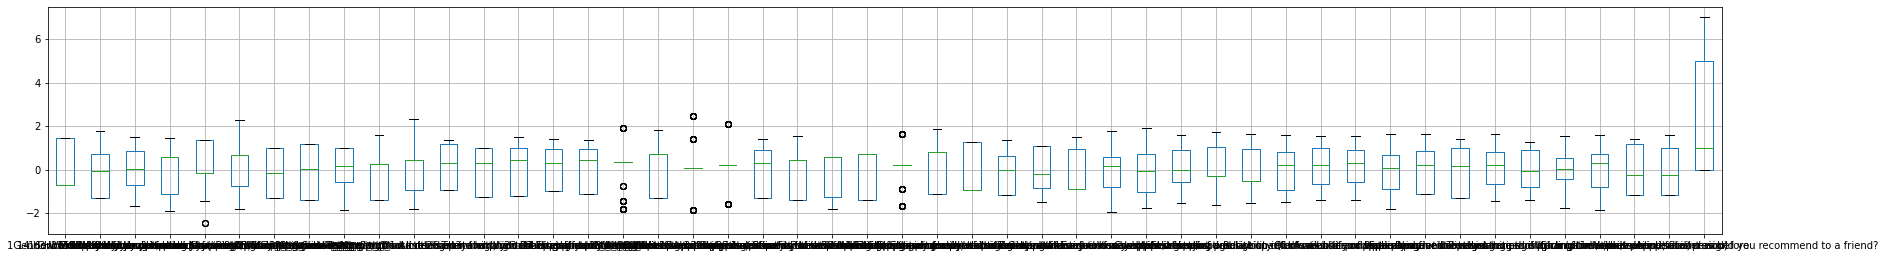

In [57]:
df2.boxplot(figsize=(30,5))
plt.subplots_adjust(bottom=0.25)
plt.show()

 we will proceed with the removal of outliers

# Remove Outliers with Quartile

In [58]:
Q1 = np.percentile(df2, 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [59]:
print("Old Shape: ", df2.shape)

Old Shape:  (269, 48)


In [60]:
# Upper bound
upper = np.where(df2 >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df2 <= (Q1-1.5*IQR))

In [61]:
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)
 
print("New Shape: ", df2.shape)

New Shape:  (186, 48)


The outliers are removed. The dataset is ready to split for training.

In [62]:
df2


1Gender of respondent  2 How old are you?   \
1                -0.697272            -1.323991   
3                 1.434161            -1.323991   
4                -0.697272            -1.323991   
7                 1.434161             0.717043   
8                -0.697272             1.762698   
..                     ...                  ...   
263               1.434161             0.717043   
264              -0.697272            -1.323991   
266              -0.697272             0.717043   
267              -0.697272             1.762698   
268              -0.697272             0.717043   

     3 Which city do you shop online from?  \
1                                -0.695625   
3                                 0.572468   
4                                -1.692065   
7                                -0.695625   
8                                 1.515552   
..                                     ...   
263                              -0.695625   
264                               1.515552   
266                              -1.692065   
267                               1.515552   
268                              -0.326067   

     5 Since How Long You are Shopping Online ?  \
1                                      0.563671   
3                                     -0.306124   
4                                     -1.132432   
7                                     -0.306124   
8                                     -1.132432   
..                                          ...   
263                                   -0.306124   
264                                   -1.896120   
266                                   -1.132432   
267                                   -1.132432   
268                                   -1.132432   

     7 How do you access the internet while shopping on-line?  \
1                                             1.353375          
3                                            -1.466542          
4                                             1.353375          
7                                            -1.466542          
8                                             1.353375          
..                                                 ...          
263                                          -1.466542          
264                                          -1.466542          
266                                          -0.169001          
267                                           1.353375          
268                                          -1.466542          

     8 Which device do you use to access the online shopping?  \
1                                             0.647141          
3                                             0.647141          
4                                             0.647141          
7                                            -1.826002          
8                                             0.647141          
..                                                 ...          
263                                          -1.826002          
264                                           0.647141          
266                                          -0.742501          
267                                           0.647141          
268                                           0.647141          

     10 What is the operating system (OS) of your device?\t\t\t\t                                            \
1                                            -0.156765                                                        
3                                            -0.156765                                                        
4                                            -0.156765                                                        
7                                             0.994971                                                        
8                                            -1.313730                                                       

The dataset is ready to split for training and testing.

# Spliting the data and Balancing 

In [64]:
x= df2.iloc[:,0:-1]
y=df2.iloc[:,-1]

In [65]:
y.value_counts()

0    79
1    62
3    30
2    15
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

The dataset is imbalanced. so we shall use SMOTE to balance the dataset

# Balancing the dataset-SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [68]:
y1.value_counts()

0    79
1    79
2    79
3    79
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

Now the model is balanced. So we will proceed to train the model

Since the Target variable is categorical with more than 2 classes, we use classification models to train our data

# Train The Model

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# TO Find Best Random State

MultinomialNB- With negative values in input variable, NB is not possible

# DecisionTreeClassifier

In [70]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=25,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(xtrain,ytrain)
    preddtc= dtc.predict(xtest)
    acc= accuracy_score(ytest,preddtc)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 1.0 on Random_state 1


# To Find the Best Cross Validation Score 

In [71]:
pred_tr= dtc.predict(xtrain)
pred_ts= dtc.predict(xtest)

In [72]:
train_score= accuracy_score(ytrain,pred_tr)
test_score= accuracy_score(ytest,pred_ts)

In [73]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(dtc,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_score} and the accuracy for testing is {test_score}")
    print("\n")

At cross fold 2 the cv score is 1.0 and accuracy score for training is 1.0 and the accuracy for testing is 1.0


At cross fold 3 the cv score is 1.0 and accuracy score for training is 1.0 and the accuracy for testing is 1.0


At cross fold 4 the cv score is 1.0 and accuracy score for training is 1.0 and the accuracy for testing is 1.0


At cross fold 5 the cv score is 0.996875 and accuracy score for training is 1.0 and the accuracy for testing is 1.0


At cross fold 6 the cv score is 1.0 and accuracy score for training is 1.0 and the accuracy for testing is 1.0


At cross fold 7 the cv score is 1.0 and accuracy score for training is 1.0 and the accuracy for testing is 1.0


At cross fold 8 the cv score is 1.0 and accuracy score for training is 1.0 and the accuracy for testing is 1.0


At cross fold 9 the cv score is 1.0 and accuracy score for training is 1.0 and the accuracy for testing is 1.0




 We choose random_State 1, Cv= 3 to train the models

# DecisionTreeClassifier

In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('acc=', accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

acc= 1.0
[[6 0 0 0]
 [0 7 0 0]
 [0 0 5 0]
 [0 0 0 7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [75]:
cr_dtc=cross_val_score(dtc,x1,y1,cv=3)
print('Cross Validation Score of DecisionTreeClassifier is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeClassifier is: 1.0


# Lasso Regularization

In [76]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [77]:
ls=Lasso(alpha=0.0001)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)

0.9999999289371478

In [78]:
predls= ls.predict(xtest)
print('R2 score=', r2_score(ytest,predls))
print('MSE=', mean_squared_error(ytest,predls))

R2 score= 0.9999999647316755
MSE= 4.5482031323273085e-08


The regularization also provides the same accuracy and very minor error indicating the model performs exactly to the results.

With every model, the accuracy is good. So we will choose the base model used- DecisionTreeClassifier.
Lets tune the parameters to see if the model gives full accuracy again even after tuning.

# HyperParameter Tuning With GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [81]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["gini", "entropy"],
            'max_depth':[3,4,5,6]}

In [82]:
GCV=GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [83]:
GCV.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='auto')

In [84]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.96

In [85]:
dtc=DecisionTreeClassifier(criterion='entropy',
                           max_depth=5,
                           max_features='auto',
                           min_samples_leaf=2)
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('acc=', accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

acc= 1.0
[[6 0 0 0]
 [0 7 0 0]
 [0 0 5 0]
 [0 0 0 7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



# Save The Model

In [86]:
import pickle
filename= 'Customer_Retention.pkl'
pickle.dump(dtc,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [87]:
x=np.array(ytest)
predicted= np.array(dtc.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

original  Predicted
0          3          3
1          0          0
2          2          2
3          1          1
4          3          3
5          3          3
6          2          2
7          1          1
8          2          2
9          3          3
10         1          1
11         0          0
12         1          1
13         0          0
14         0          0
15         2          2
16         3          3
17         1          1
18         0          0
19         1          1
20         0          0
21         1          1
22         2          2
23         3          3
24         3          3

The Predicted results are exactly same as that of Original results. So the model works perfectly with the dataset.

So, the mostly recommended website is AMAZON.COM